## **EDA :** Weather AUS

#### _Rain in Australia_

🟢 `complete`

---

1. **Identification générale**
    * Structure
    * Données cibles
    * Types de données
    * Contenu des données
    * Préparation
    * Notes
2. **Analyse univariée**
    * Cible
    * Variables quantitatives continues
    * Variables quantitatives discrètes
    * Variables qualitatives
3. **Analyse bivariée**
    * Variables quantitatives continues
    * Variables quantitatives discrètes
    * Variables qualitatives
    * Statistiques
4. **Finalisation**
    * Conclusion
    * Traitements

**Built-in**

In [1]:
import datetime

**Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**User Code**

In [3]:
draw = False

**Notebook setup**

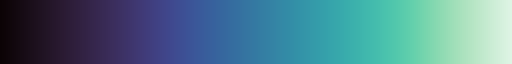

In [15]:
# Colour codes
mean_c = '#FFFFFF'
median_c = '#c2e800'
default_c = '#336699'
palette_c = [
    '#b8e600', # Sunny
    '#00bfff' # Rainy
]
hue_o = [
    'No',
    'Yes'
]

# Pandas
pd.options.display.max_rows = 30
pd.options.display.min_rows = 6

# Matplotlib
plt.style.use('dark_background')

plt.rcParams['figure.facecolor'] = '#242428'
plt.rcParams['axes.facecolor'] = '#242428'
plt.rcParams['axes.titleweight'] = 'bold'

# Seaborn : display crest, mako, rocket, icefire ...
sns.color_palette("mako", as_cmap=True)

**Weather AUS**

[Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)

In [5]:
weather_file_path = './_datasets/weatherAUS_data.csv'
weather_data = pd.read_csv(weather_file_path, parse_dates=['Date'])

weather_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


**Notes**
* `Wet Season` : approx. du 1<sup>er</sup> novembre au 30 avril
* `Dry Season` : approx. du 1<sup>er</sup> mai au 31 octobre

In [6]:
target = 'RainTomorrow'

---
### **1.** Identification générale

##### **1.1** - Structure

In [118]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

##### **1.2** - Donnée(s) cible(s)

In [14]:
# (!) - Content `Yes`, `No` and `nan`
weather_data[target].unique()

array(['No', 'Yes', nan], dtype=object)

##### **1.3** - Types de données

In [15]:
pd.DataFrame({
    'Quantité de valeurs': weather_data.dtypes.value_counts()
})

,Quantité de valeurs
float64,16
object,6
datetime64[ns],1


In [19]:
if weather_data.select_dtypes(np.float_).shape[1] > 0 :
    display(
        pd.DataFrame({
            'Valeurs minimums (float)': weather_data.select_dtypes(np.float_).min(),
            'Valeurs maximums (float)': weather_data.select_dtypes(np.float_).max()
        }, dtype=np.float_)
    )

,Valeurs minimums (float),Valeurs maximums (float)
MinTemp,-8.5,33.9
MaxTemp,-4.8,48.1
Rainfall,0.0,371.0
Evaporation,0.0,145.0
Sunshine,0.0,14.5
WindGustSpeed,6.0,135.0
WindSpeed9am,0.0,130.0
WindSpeed3pm,0.0,87.0
Humidity9am,0.0,100.0
Humidity3pm,0.0,100.0


In [20]:
if weather_data.select_dtypes(np.object_).shape[1] > 0 :
    display(
        weather_data.select_dtypes(np.object_)
    )

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
...,...,...,...,...,...,...
145457,Uluru,N,SE,WNW,No,No
145458,Uluru,SE,SSE,N,No,No
145459,Uluru,NaN,ESE,ESE,No,NaN


##### **1.4** - Contenu des données

Valeurs nulles

In [21]:
pd.DataFrame({
    'Quantité de valeurs nulles': weather_data.isnull().sum(),
    'Pourcentage de valeurs nulles': (weather_data.isnull().sum() / weather_data.shape[0]) * 100,
}).sort_values(by='Quantité de valeurs nulles', ascending=False)

,Quantité de valeurs nulles,Pourcentage de valeurs nulles
Sunshine,69835,48.009762
Evaporation,62790,43.166506
Cloud3pm,59358,40.807095
Cloud9am,55888,38.421559
Pressure9am,15065,10.356799
Pressure3pm,15028,10.331363
WindDir9am,10566,7.263853
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
Humidity3pm,4507,3.098446


In [124]:
# (!) - Missings on numeric values
if draw :
    plt.figure(figsize=(26,26))
    plt.title("Valeurs manquantes dans les variables numériques\n")
    sns.heatmap(weather_data.select_dtypes(np.float64).isnull(), cbar=False)
    plt.show()

_HiRes graphic in `./_outputs` directory_

<img src="./_outputs/weatherAUS_missing_numerics.png" alt="visualization of missing numerics" title="Valeurs numériques manquantes" width="151" height="148">

In [125]:
# (!) - Missings on text values
if draw :
    plt.figure(figsize=(26,26))
    plt.title("Valeurs manquantes dans les variables textuelles\n")
    sns.heatmap(weather_data.select_dtypes(np.object_).isnull(), cbar=False)
    plt.show()

_HiRes graphic in `./_outputs` directory_

<img src="./_outputs/weatherAUS_missing_texts.png" alt="visualization of missing texts" title="Valeurs textuelles manquantes" width="151" height="148">

Valeurs uniques

In [22]:
weather_data.select_dtypes(np.object_).nunique()

Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64

In [23]:
weather_data['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [24]:
weather_data['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [129]:
weather_data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [130]:
weather_data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [131]:
# (!) - Special case for 'Cloud**'
display(
    weather_data['Cloud9am'].unique(),
    weather_data['Cloud3pm'].unique()
)

array([ 8., nan,  7.,  1.,  0.,  5.,  4.,  2.,  6.,  3.,  9.])

array([nan,  2.,  8.,  7.,  1.,  5.,  4.,  6.,  3.,  0.,  9.])

Valeurs dupliquées

In [ ]:
# (!) - `Sydney` and `SydneyAirport` ? => No
sydney = weather_data.loc[
    (weather_data['Location'] == 'Sydney') | 
    (weather_data['Location'] == 'SydneyAirport')
]

for col in ['Pressure3pm', 'Evaporation', 'Sunshine', 'Cloud3pm', 'WindGustSpeed', 'Temp3pm', 'Humidity3pm'] :
    display( sydney[[col, target]].groupby(target).describe() )

In [ ]:
# (!) - In Sydney and SydneyAirport, not as much duplicated values as expected
sydney.loc[sydney.duplicated('Pressure3pm'), ['Pressure3pm', 'Evaporation', 'Cloud3pm', 'Humidity3pm']] # Change 'Pressure3pm' with another to check

In [ ]:
# (!) - `Melbourne` and `MelbourneAirport` ? => No
melbourne = weather_data.loc[
    (weather_data['Location'] == 'Melbourne') | 
    (weather_data['Location'] == 'MelbourneAirport')
]

for col in ['Pressure3pm', 'Evaporation', 'Sunshine', 'Cloud3pm', 'WindGustSpeed', 'Temp3pm', 'Humidity3pm'] :
    display( melbourne[[col, target]].groupby(target).describe() )

In [ ]:
# (!) - In Melbourne and MelbournAirport, not as much duplicated values as expected
melbourne.loc[melbourne.duplicated('Humidity3pm'), ['Pressure3pm', 'Evaporation', 'Cloud3pm', 'Humidity3pm']] # Change 'Pressure3pm' with another to check

##### **1.5** - Préparation

Listes de variables

In [35]:
continous = weather_data.select_dtypes(np.float64).columns.to_list()
continous.remove('Cloud9am')
continous.remove('Cloud3pm')
continous.remove('Rainfall') # [!] - Specific case...

discretes = ['Cloud9am', 'Cloud3pm']

categoricals = weather_data.select_dtypes(np.object_).columns.to_list()
categoricals.remove(target)
categoricals.remove('Location') # [!] - Specific case...

# [!] - 'Date', Specific case...
periods = ['Year', 'Month']

print(continous)
print(discretes)
print(categoricals)
print(periods)

['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
['Cloud9am', 'Cloud3pm']
['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
['Year', 'Month']


Modification du dataset

In [36]:
weather_data.insert(loc=1, column='Year', value=np.nan)
weather_data.insert(loc=2, column='Month', value=np.nan)

weather_data['Year'] = weather_data['Date'].apply(lambda v : v.year)
weather_data['Month'] = weather_data['Date'].apply(lambda v : v.month)

weather_data[['Year', 'Month']].astype(np.int64)

,Year,Month
0,2008,12
1,2008,12
2,2008,12
...,...,...
145457,2017,6
145458,2017,6
145459,2017,6


##### **1.6** - Notes

> —
>
> ✔️ Les valeurs pour **Sydney** et **SydneyAirport**, ainsi que **Melbourne** et **MelbourneAirport** ne sont pas des doublons.
>
> ✔️ Les entrées enregistrées aux heures `*_9am` et `*_3pm`, ainsi que les `MinTemp` et `MaxTemp`, seront probablement fusionnées et moyennées ; ou seulement une de chaque sera conservée.
>
> ✔️ La variable `Rainfall` sera probablement supprimée puisqu'elle affiche une description statistique farfelue.
>
> ✔️ Les variables `Sushine` et `Evaporation` comportent presque 50% de valeurs nulles.
> 
> —

---
### **2.** Analyse univariée

##### **2.1** - Cible

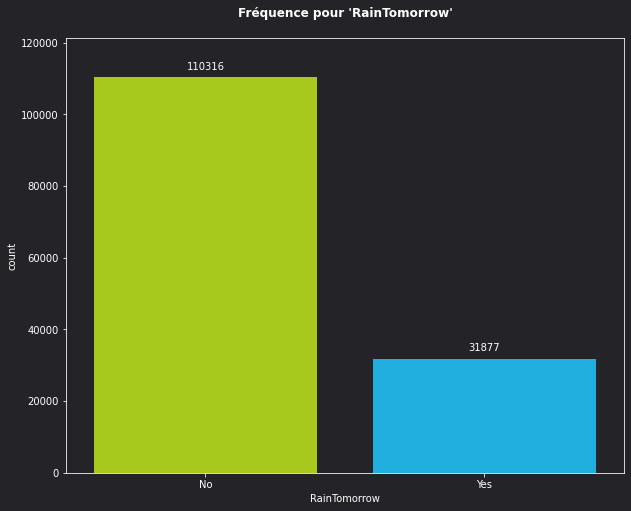

In [31]:
hgt = weather_data[target].value_counts().max()

plt.figure(figsize=(10, 8))
plt.title(f"Fréquence pour '{target}'\n")
ax = sns.countplot(data=weather_data.sort_values(target), x=target, palette=palette_c)
ax.bar_label(ax.containers[0], padding=6)
plt.ylim(top=hgt*1.1)
plt.show()

In [33]:
cnt = weather_data[[target]].groupby(target).value_counts()
pct = (cnt / weather_data.shape[0]) * 100

pd.DataFrame({
    'Quantité': cnt,
    'Pourcentage': pct
}).reset_index()

,RainTomorrow,Quantité,Pourcentage
0,No,110316,75.839406
1,Yes,31877,21.914616


**Observations**

> —
> 
> ❕ Environ **76 %** du dataset comporte des jours pour lesquels il a plu le lendemain.
> 
> ❓ _Quelle est la fréquence des `RainTomorrow` par rapport aux `RainToday` ? Quels étaient le taux `Humidity` moyen, le volume de `Rainfall`, l'intensité `Cloud` moyenne ?_
>
> —

##### **2.2** - Variables quantitatives continues

Fréquences et densités

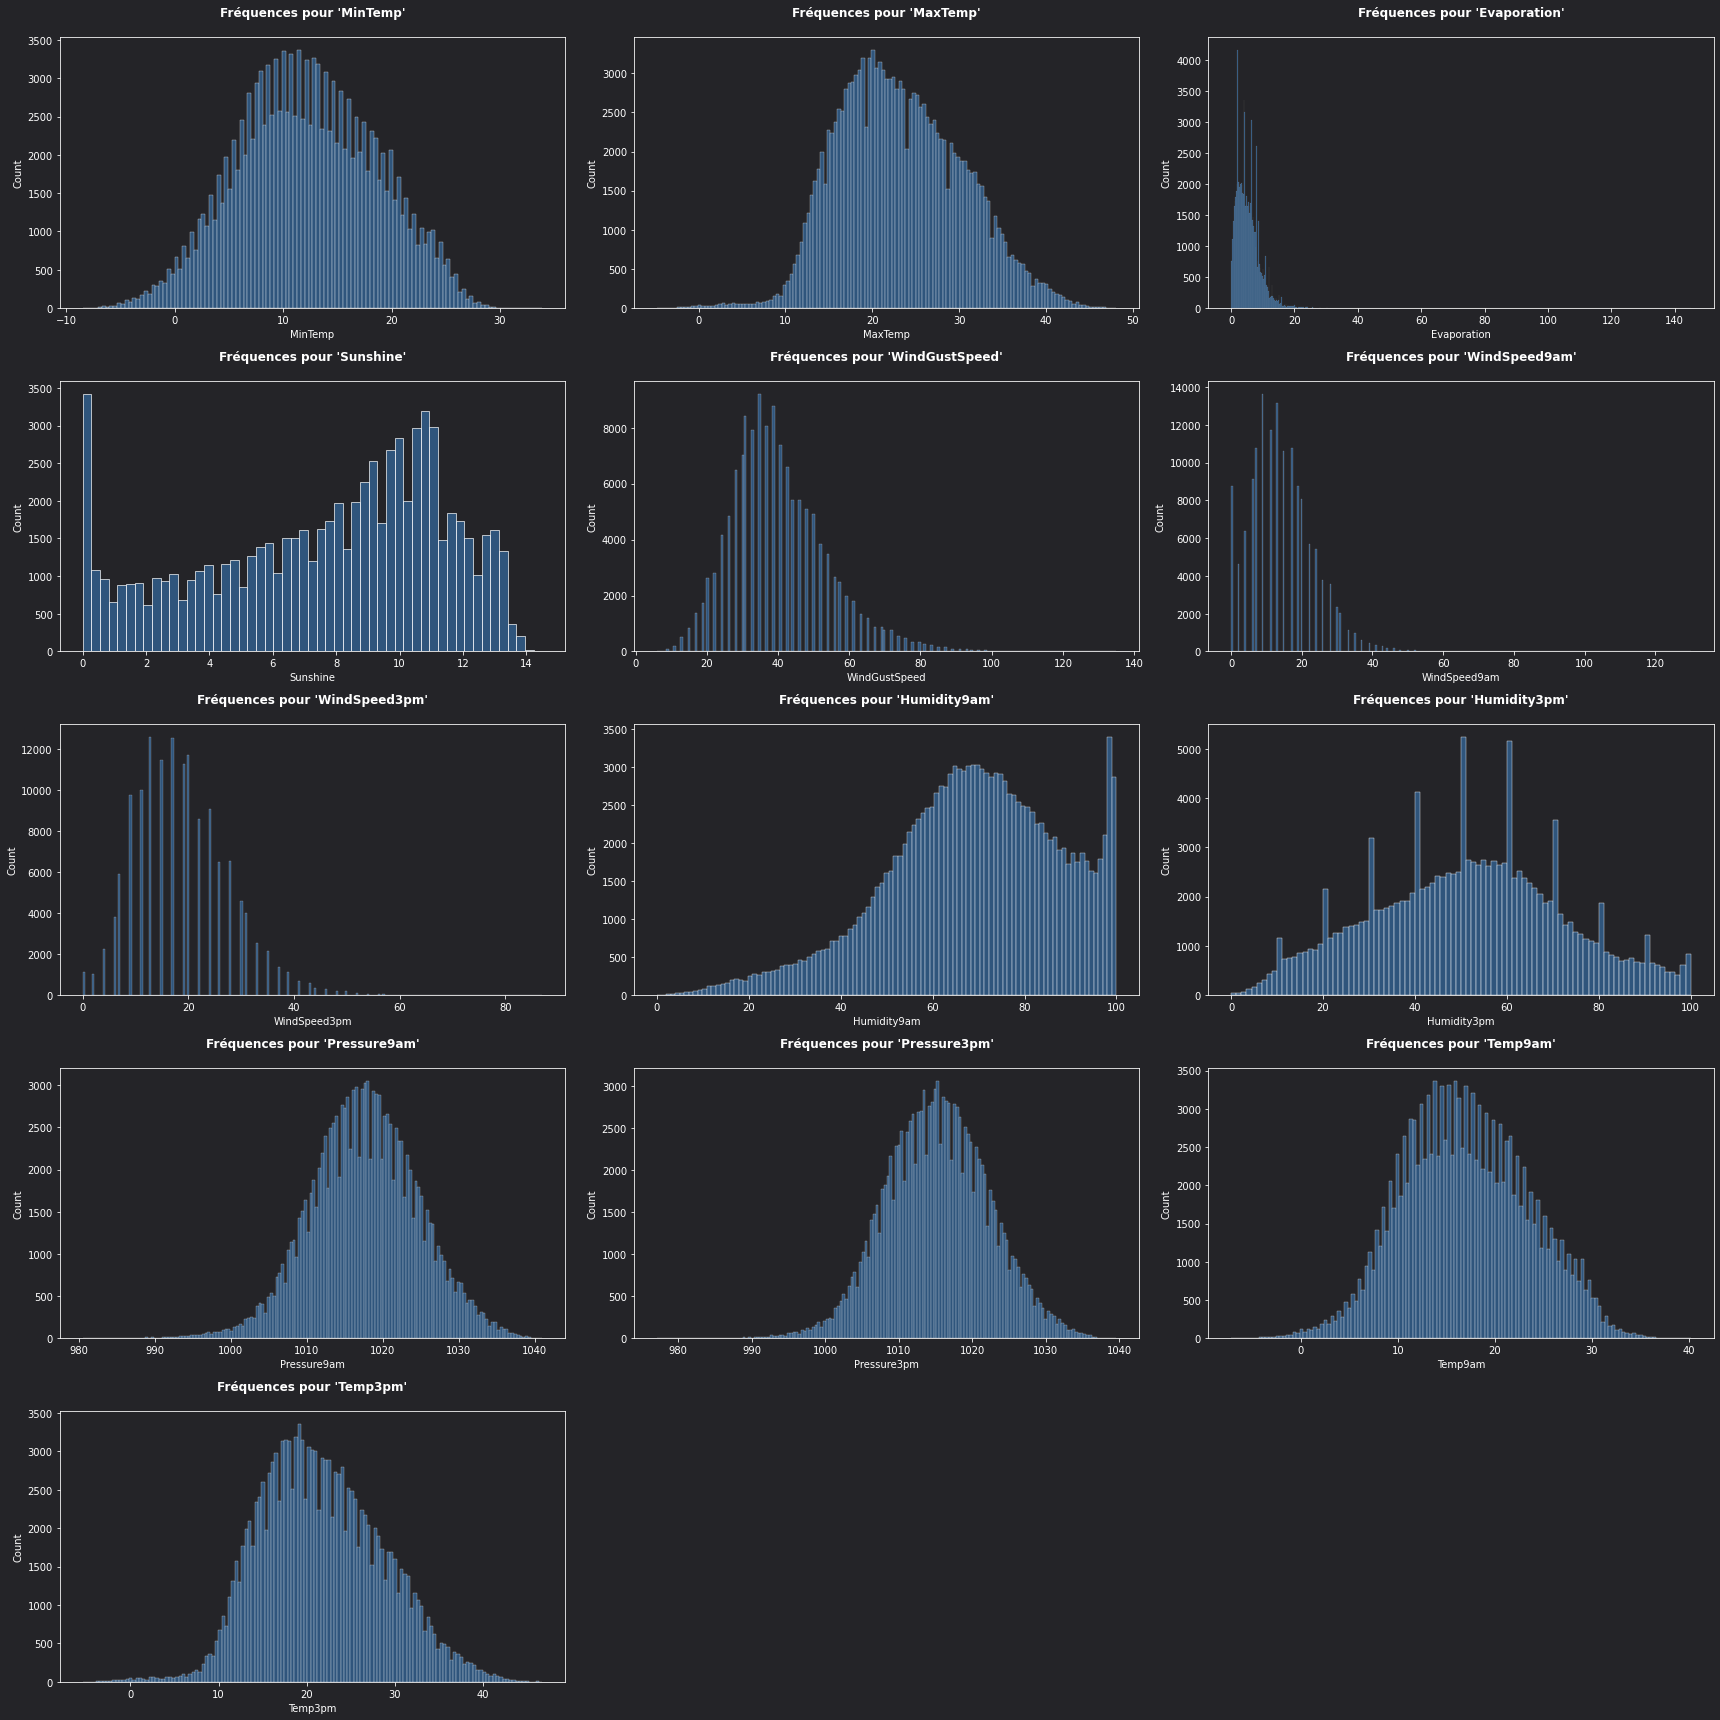

In [39]:
plt.figure(figsize=(24, 24), layout='tight')
for i, col in enumerate(continous) :
    plt.subplot(5, 3, i+1)
    plt.title(f"Fréquences pour '{col}'\n")
    sns.histplot(data=weather_data, x=col, fill=True, color=default_c)
plt.show()

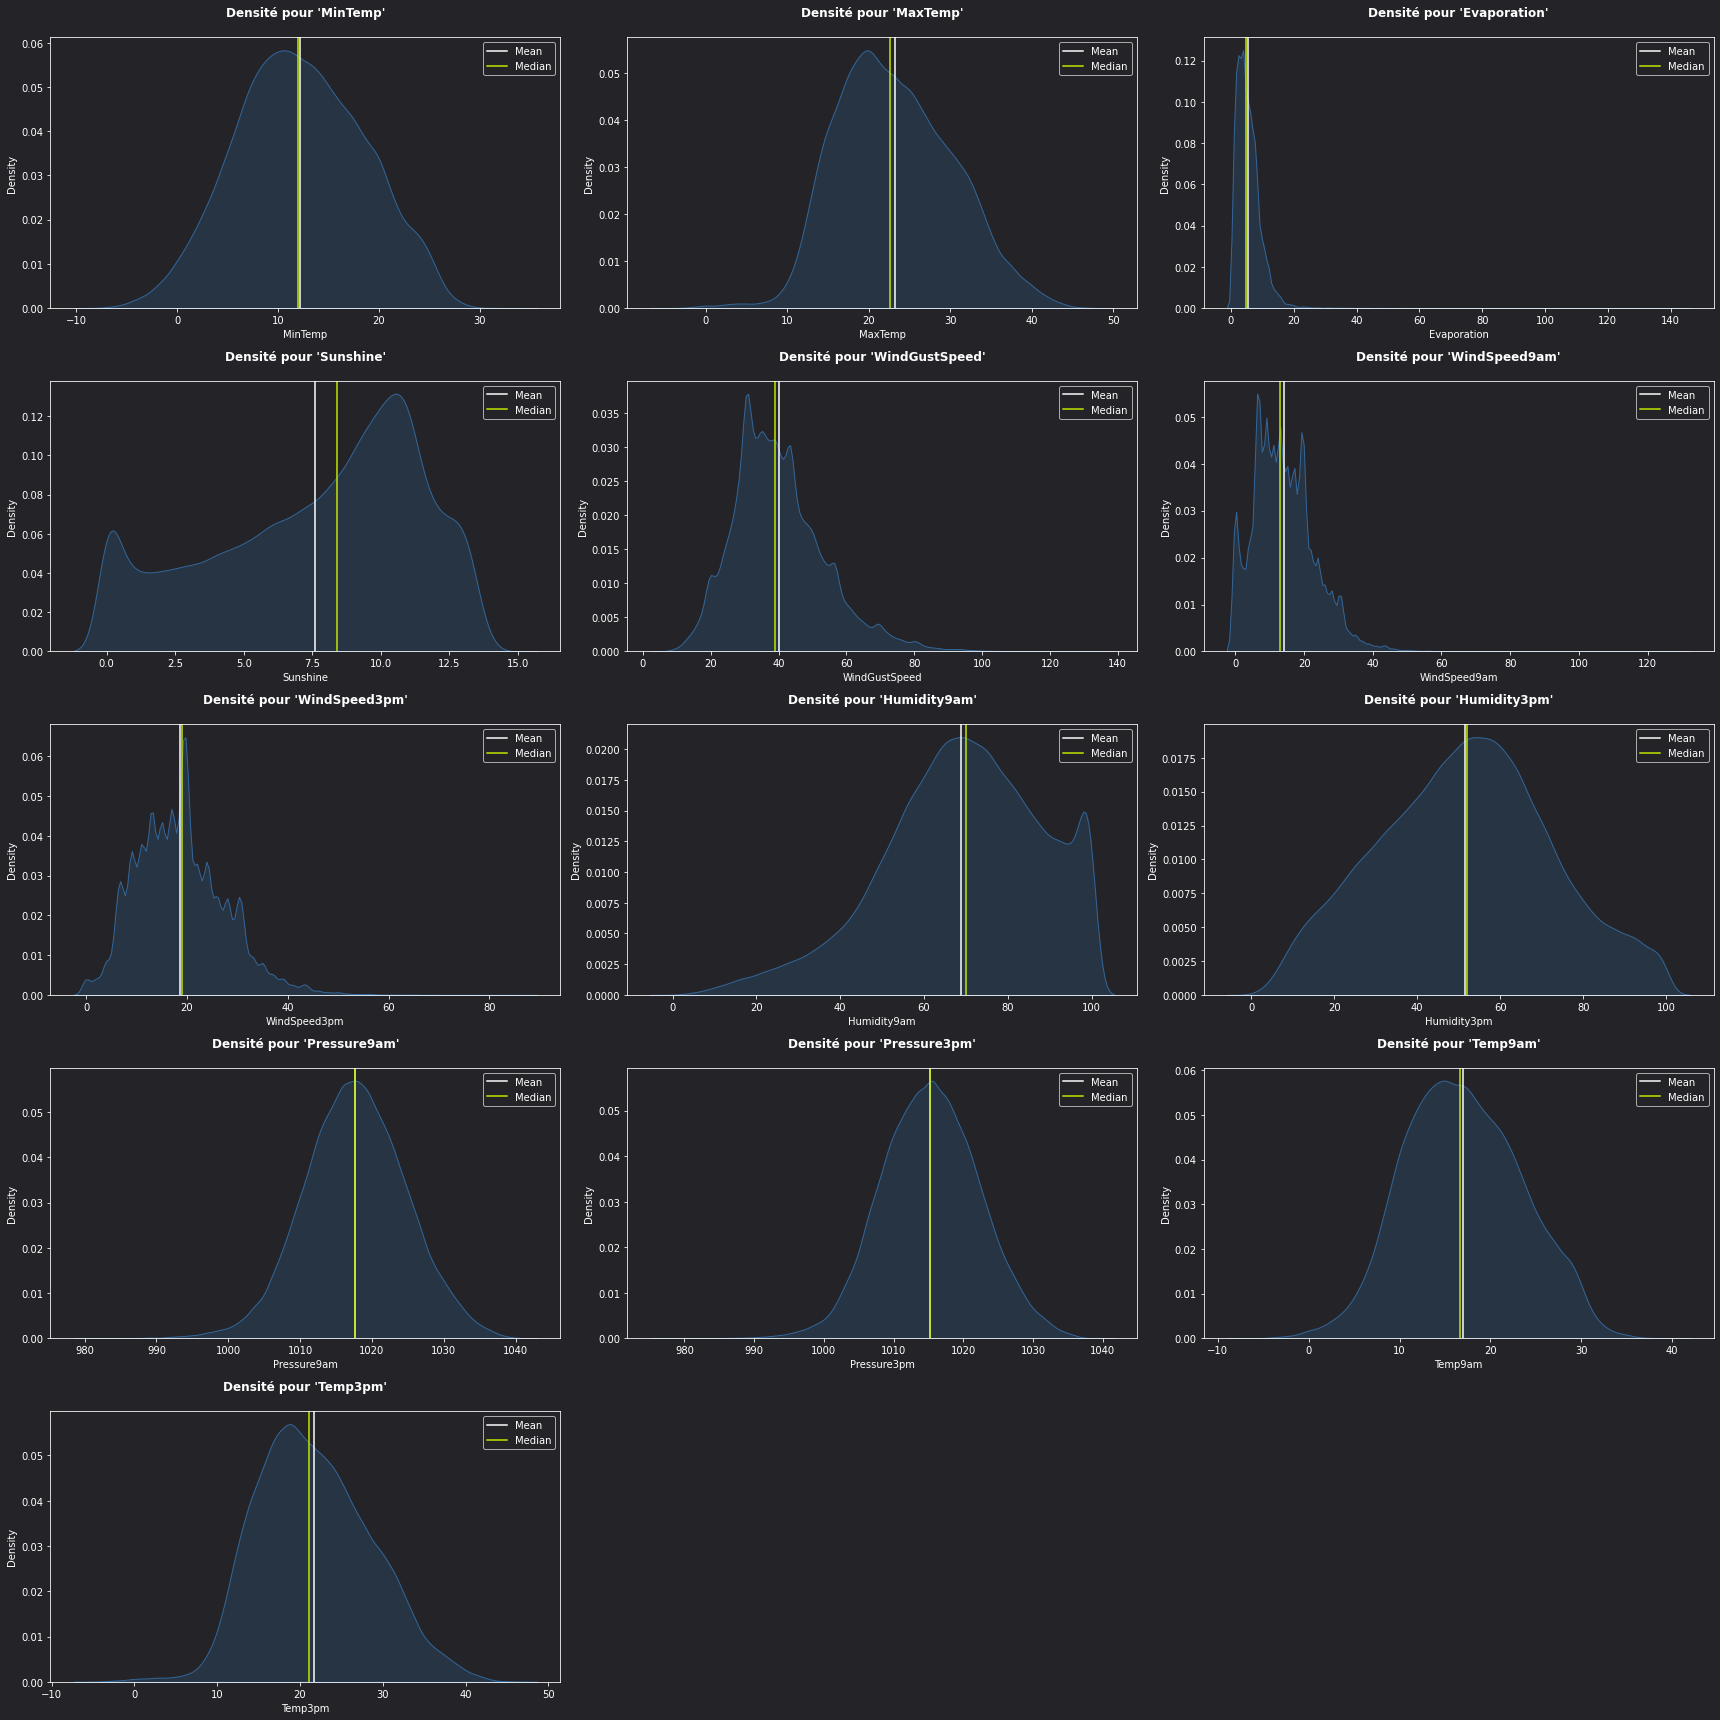

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
mean,12.194034,23.221348,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,16.990631,21.68339
std,6.398495,7.119049,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,-7.200000,-5.40000
25%,7.600000,17.900000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,12.300000,16.60000
50%,12.000000,22.600000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,16.700000,21.10000
75%,16.900000,28.200000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,21.600000,26.40000
max,33.900000,48.100000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,40.200000,46.70000


In [41]:
plt.figure(figsize=(24, 24), layout='tight')
for i, col in enumerate(continous) :
    plt.subplot(5, 3, i+1)
    plt.title(f"Densité pour '{col}'\n")
    sns.kdeplot(data=weather_data, x=col, fill=True, color=default_c)
    plt.axvline(weather_data[col].mean(), c=mean_c, label='Mean')
    plt.axvline(weather_data[col].median(), c=median_c, label="Median")
    plt.legend()
plt.show()

weather_data[continous].describe().iloc[1:]

Variable `Rainfall`

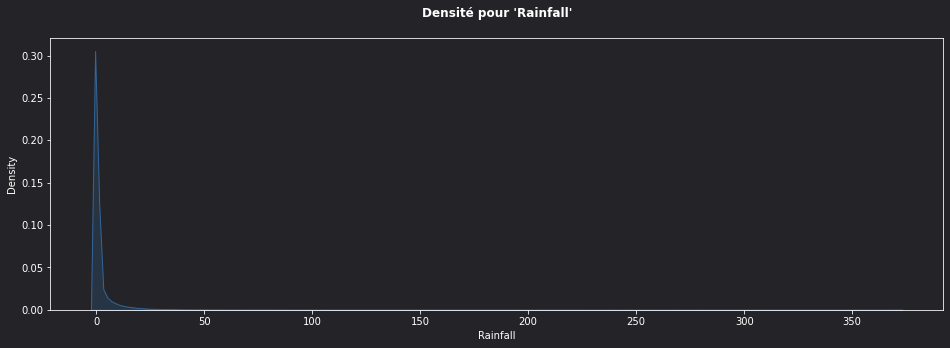

In [167]:
plt.figure(figsize=(16, 5))
plt.title(f"Densité pour 'Rainfall'\n")
sns.kdeplot(data=weather_data, x='Rainfall', fill=True, color=default_c)
plt.show()

In [140]:
weather_data[['Rainfall']].describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall,142199.0,2.360918,8.47806,0.0,0.0,0.0,0.8,371.0


Valeurs aberrantes

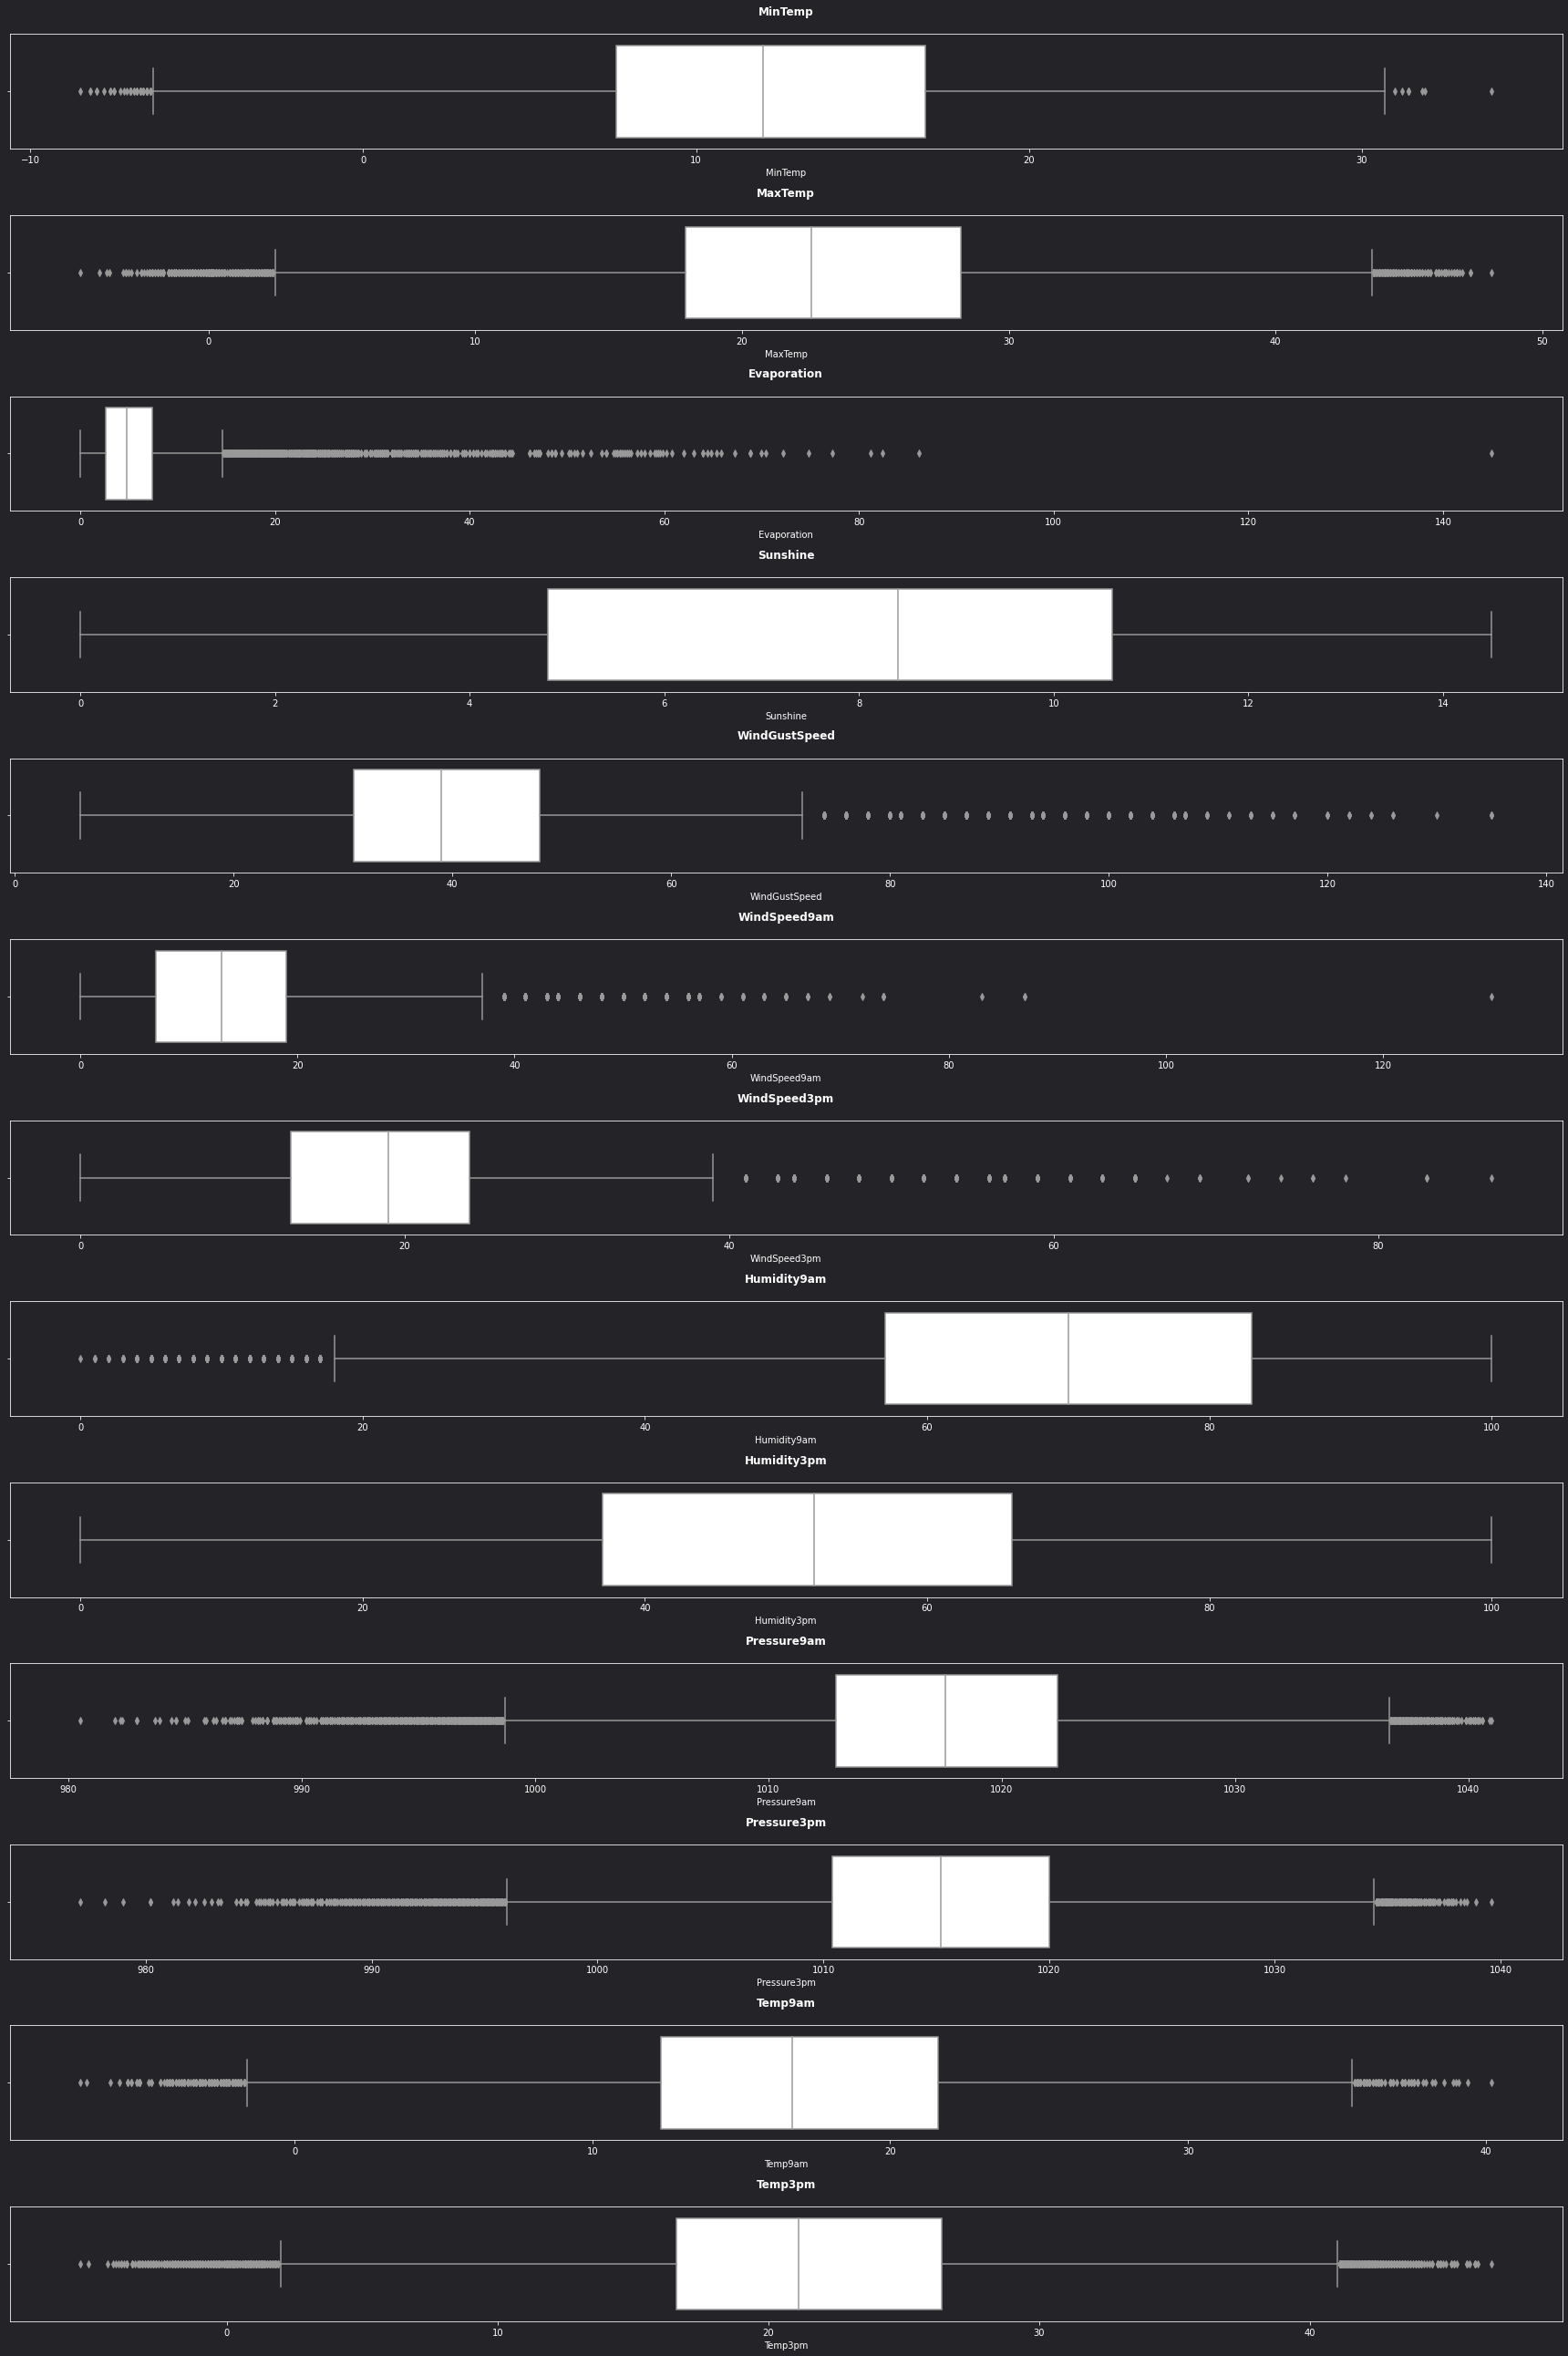

In [168]:
plt.figure(figsize=(24, 36), layout='tight')
for i, col in enumerate(continous) :
    plt.subplot(13, 1, i+1)
    plt.title(f"{col}\n")
    sns.boxplot(data=weather_data, x=col, color="#FFFFFF")
plt.show()

In [142]:
q25 = weather_data[['MinTemp', 'MaxTemp', 'Evaporation', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']].quantile(.25)
q75 = weather_data[['MinTemp', 'MaxTemp', 'Evaporation', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']].quantile(.75)
iqr = q75 - q25
lows = q25 - (1.5 * iqr)
ups = q75 + (1.5 * iqr)

pd.DataFrame({
    'Limite inférieure': lows,
    'Limite suppérieure': ups,
})

,Limite inférieure,Limite suppérieure
MinTemp,-6.35,30.85
MaxTemp,2.45,43.65
Evaporation,-4.60,14.60
Pressure9am,998.65,1036.65
Pressure3pm,996.00,1034.40
Temp9am,-1.65,35.55
Temp3pm,1.90,41.10


In [143]:
print(f"Entrées où 'Evaporation' est supérieure à {ups['Evaporation']} :")
age_hi_outliers = weather_data.loc[weather_data['Evaporation'] > ups['Evaporation']].sort_values('Evaporation')

display(age_hi_outliers)

cnt = age_hi_outliers[[target]].groupby(target).value_counts()
pct = (cnt / weather_data.shape[0]) * 100 

pd.DataFrame({
    'Quantité : Evaporation > 14.6': cnt,
    'Pourcentage : Evaporation > 14.6': pct
}).reset_index()

Entrées où 'Evaporation' est supérieure à 14.600000000000001 :


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
27445,2009-10-06,Richmond,8.3,21.3,0.0,14.7,NaN,E,30.0,S,...,78.0,47.0,1020.6,1015.9,NaN,NaN,14.2,19.9,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
96578,2009-03-16,Adelaide,14.3,20.0,6.0,14.8,3.2,WSW,41.0,S,...,90.0,54.0,1018.6,1018.4,NaN,NaN,15.2,19.2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106968,2013-01-07,Woomera,24.6,45.3,0.0,82.4,NaN,SE,74.0,ESE,...,22.0,9.0,1013.8,1009.4,0.0,1.0,31.8,44.0,No,No
8831,2016-11-11,Cobar,19.1,35.3,0.0,86.2,NaN,NNW,35.0,NW,...,NaN,NaN,1009.3,1004.6,NaN,NaN,26.7,34.1,No,No
42358,2016-12-19,Williamtown,15.3,23.9,58.2,145.0,NaN,NaN,NaN,NaN,...,72.0,52.0,1020.8,1017.0,8.0,1.0,19.1,23.0,Yes,No


,RainTomorrow,Quantité : Evaporation > 14.6,Pourcentage : Evaporation > 14.6
0,No,1735,1.192768
1,Yes,219,0.150557


**Observations**

> — 
> 
> ❕ Les valeurs de la variable `Rainfall` sont très (trop) incohérentes. La variable `Evaporation` présente une distribution très éloignée de la normale et beaucoup de valeurs aberrantes. 
> 
> —

##### **2.3** - Variables quantitatives discrètes

Fréquence

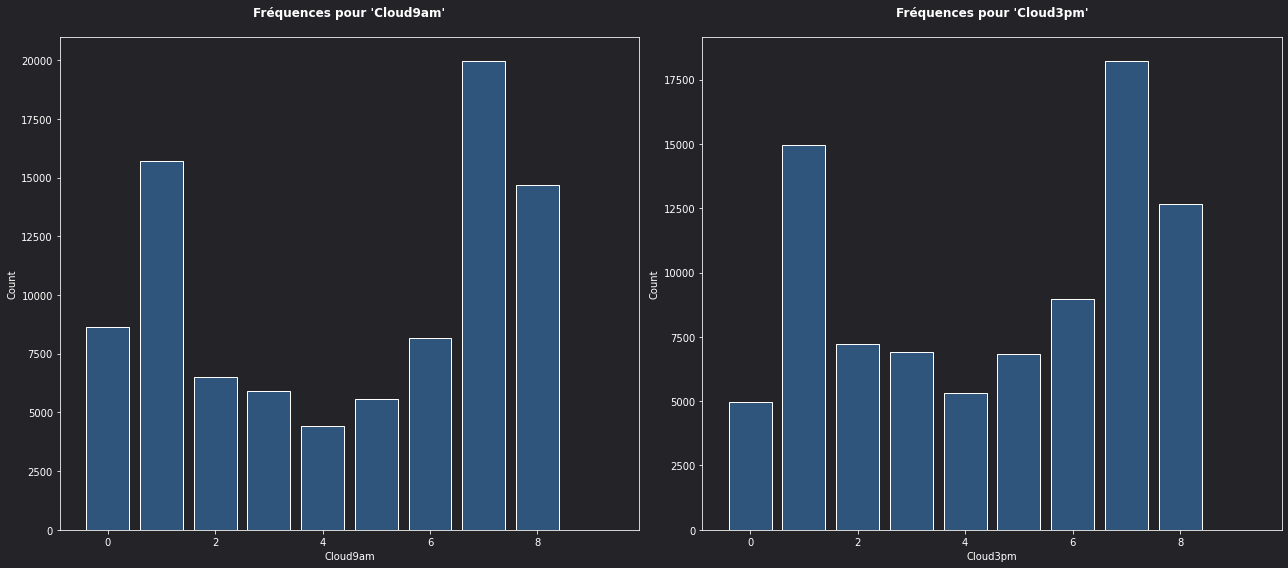

In [169]:
plt.figure(figsize=(18, 8), layout='tight')
for i, col in enumerate(discretes) :
    plt.subplot(1, 2, i+1)
    plt.title(f"Fréquences pour '{col}'\n")
    sns.histplot(data=weather_data, x=col, fill=True, discrete=True, shrink=.8, color=default_c)
plt.show()

In [42]:
weather_data[discretes].describe().T

,count,mean,std,min,25%,50%,75%,max
Cloud9am,89572.0,4.447461,2.887159,0.0,1.0,5.0,7.0,9.0
Cloud3pm,86102.0,4.509930,2.720357,0.0,2.0,5.0,7.0,9.0


**Observations**

> — 
> 
> ❕ Les distributions de `Cloud9am` et `Cloud3pm` sont très similaires. 
>
> ❓ _Est-ce que les variables `Cloud9am` et `Cloud3pm` présente une distribution différente lorsqu'elles sont croisées avec la cible ? Est-ce la variable `Cloud3pm` est plus corrélée avec la cible que la variable `Cloud9pm` ?_ 
> 
> —

##### **2.4** - Variables qualitatives

Fréquence

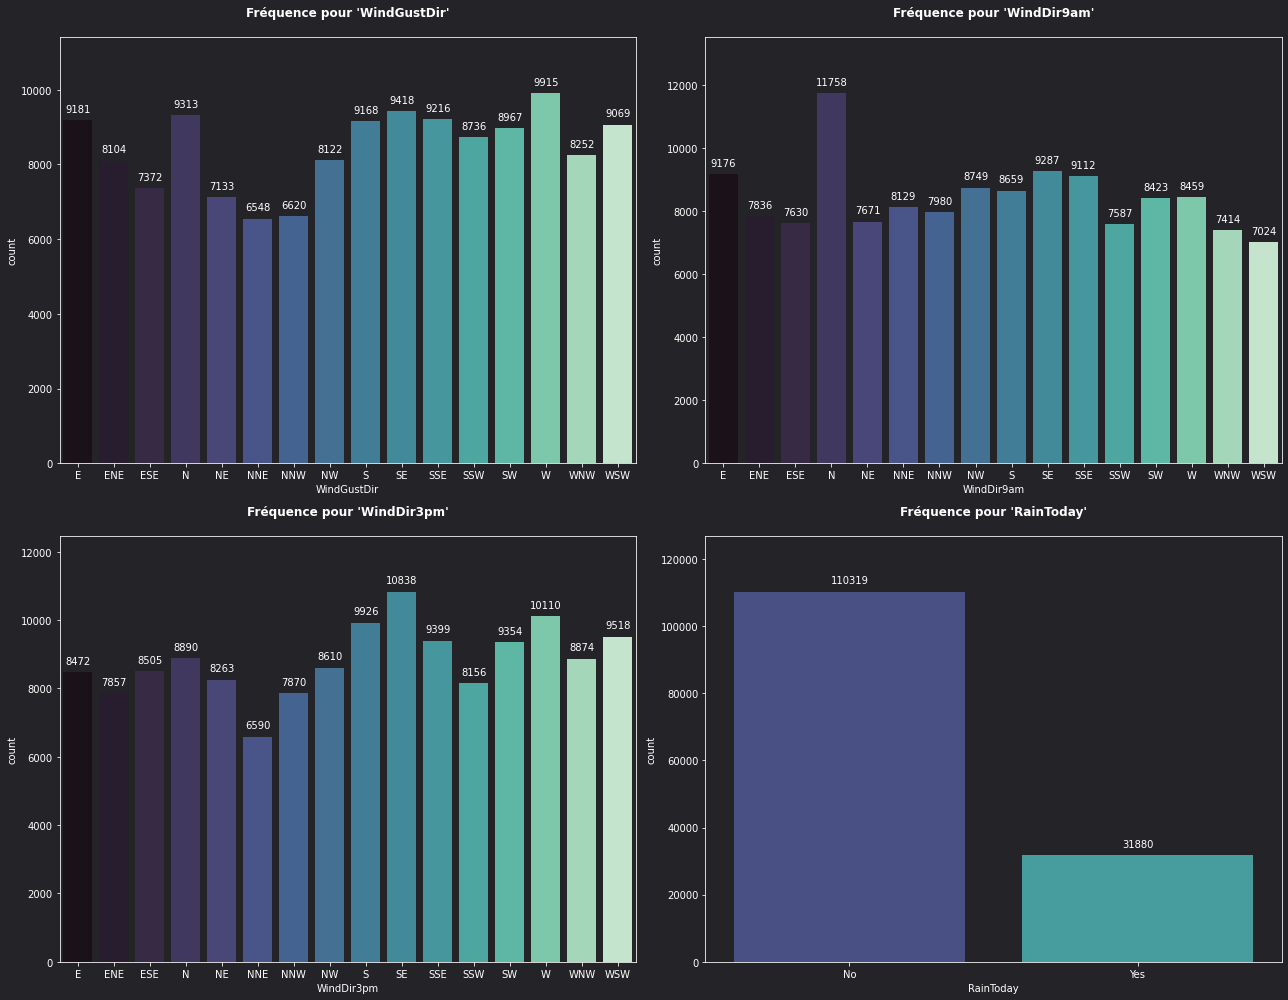

In [170]:
plt.figure(figsize=(18, 14), layout='tight')
for i, col in enumerate(categoricals) :
    hi_freq = weather_data[col].value_counts().max()
    plt.subplot(2, 2, i+1)
    plt.title(f"Fréquence pour '{col}'\n")
    ax = sns.countplot(data=weather_data.sort_values(col), x=col, palette='mako')
    ax.bar_label(ax.containers[0], padding=6)
    plt.ylim(top=hi_freq*1.15)
plt.show()

Variable `RainToday`

In [15]:
cnt = weather_data[['RainToday']].groupby('RainToday').value_counts()
pct = (cnt / weather_data.shape[0]) * 100

pd.DataFrame({
    'Quantité': cnt,
    'Pourcentage': pct
}).reset_index()

,RainToday,Quantité,Pourcentage
0,No,110319,75.841468
1,Yes,31880,21.916678


Variable `RainTomorrow`

RainTomorrow | Quantité | Pourcentage
------------ | -------- | -----------
No | 110316 | 75.839406
Yes | 31877 | 21.914616

Variable `Location`

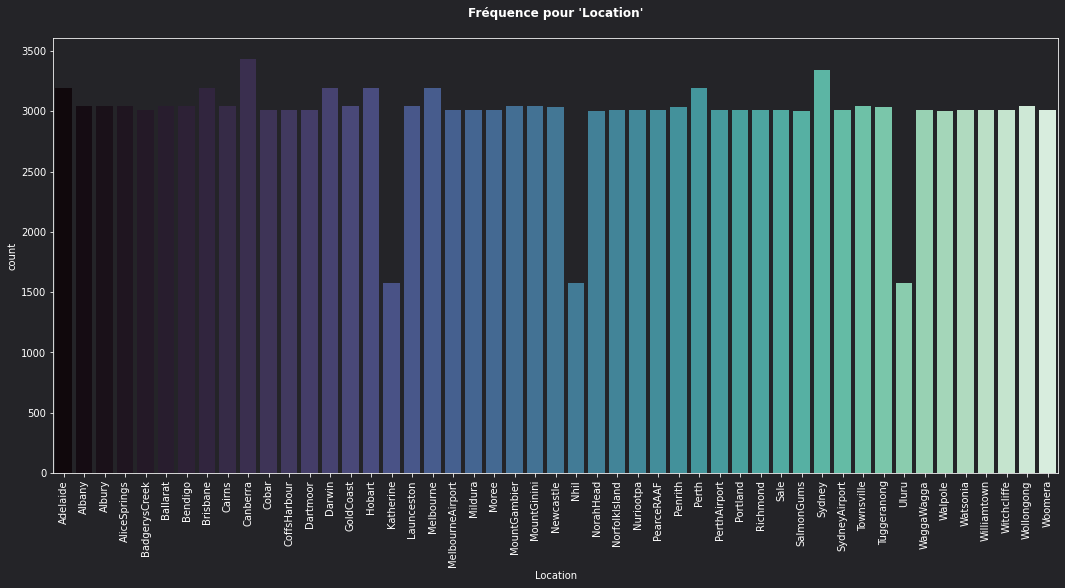

In [171]:
plt.figure(figsize=(18, 8))
plt.title(f"Fréquence pour 'Location'\n")
sns.countplot(data=weather_data.sort_values('Location'), x='Location', palette='mako')
plt.xticks(rotation=90)
plt.show()

**Observations**

> —
> 
> ❕ Les distributions de `WinDir9am` et `WinDir3pm` présente plusieurs différences. La variables `RainToday` affiche presque les mêmes statistiques que la `RainTomorrow`. Hormis 3 villes, **Katherine**, **Nhil** et **Uluru**, où l'on a enregistré moitié moins de données, la distribution est assez uniforme pour la variable `Location`. 
>
> ❓ _Est-ce la variable `WinDir3pm` est plus corrélée avec la cible que la variable `WinDir9am` ? Est-ce qu'une moyenne de ces deux variables pourrait être mieux correlée que la variable `WinDir3pm` seule ?_ 
> 
> — 

---
### **3.** Analyse bivariée

##### **3.1** - Variables quantitatives continues

Distributions selon la cible

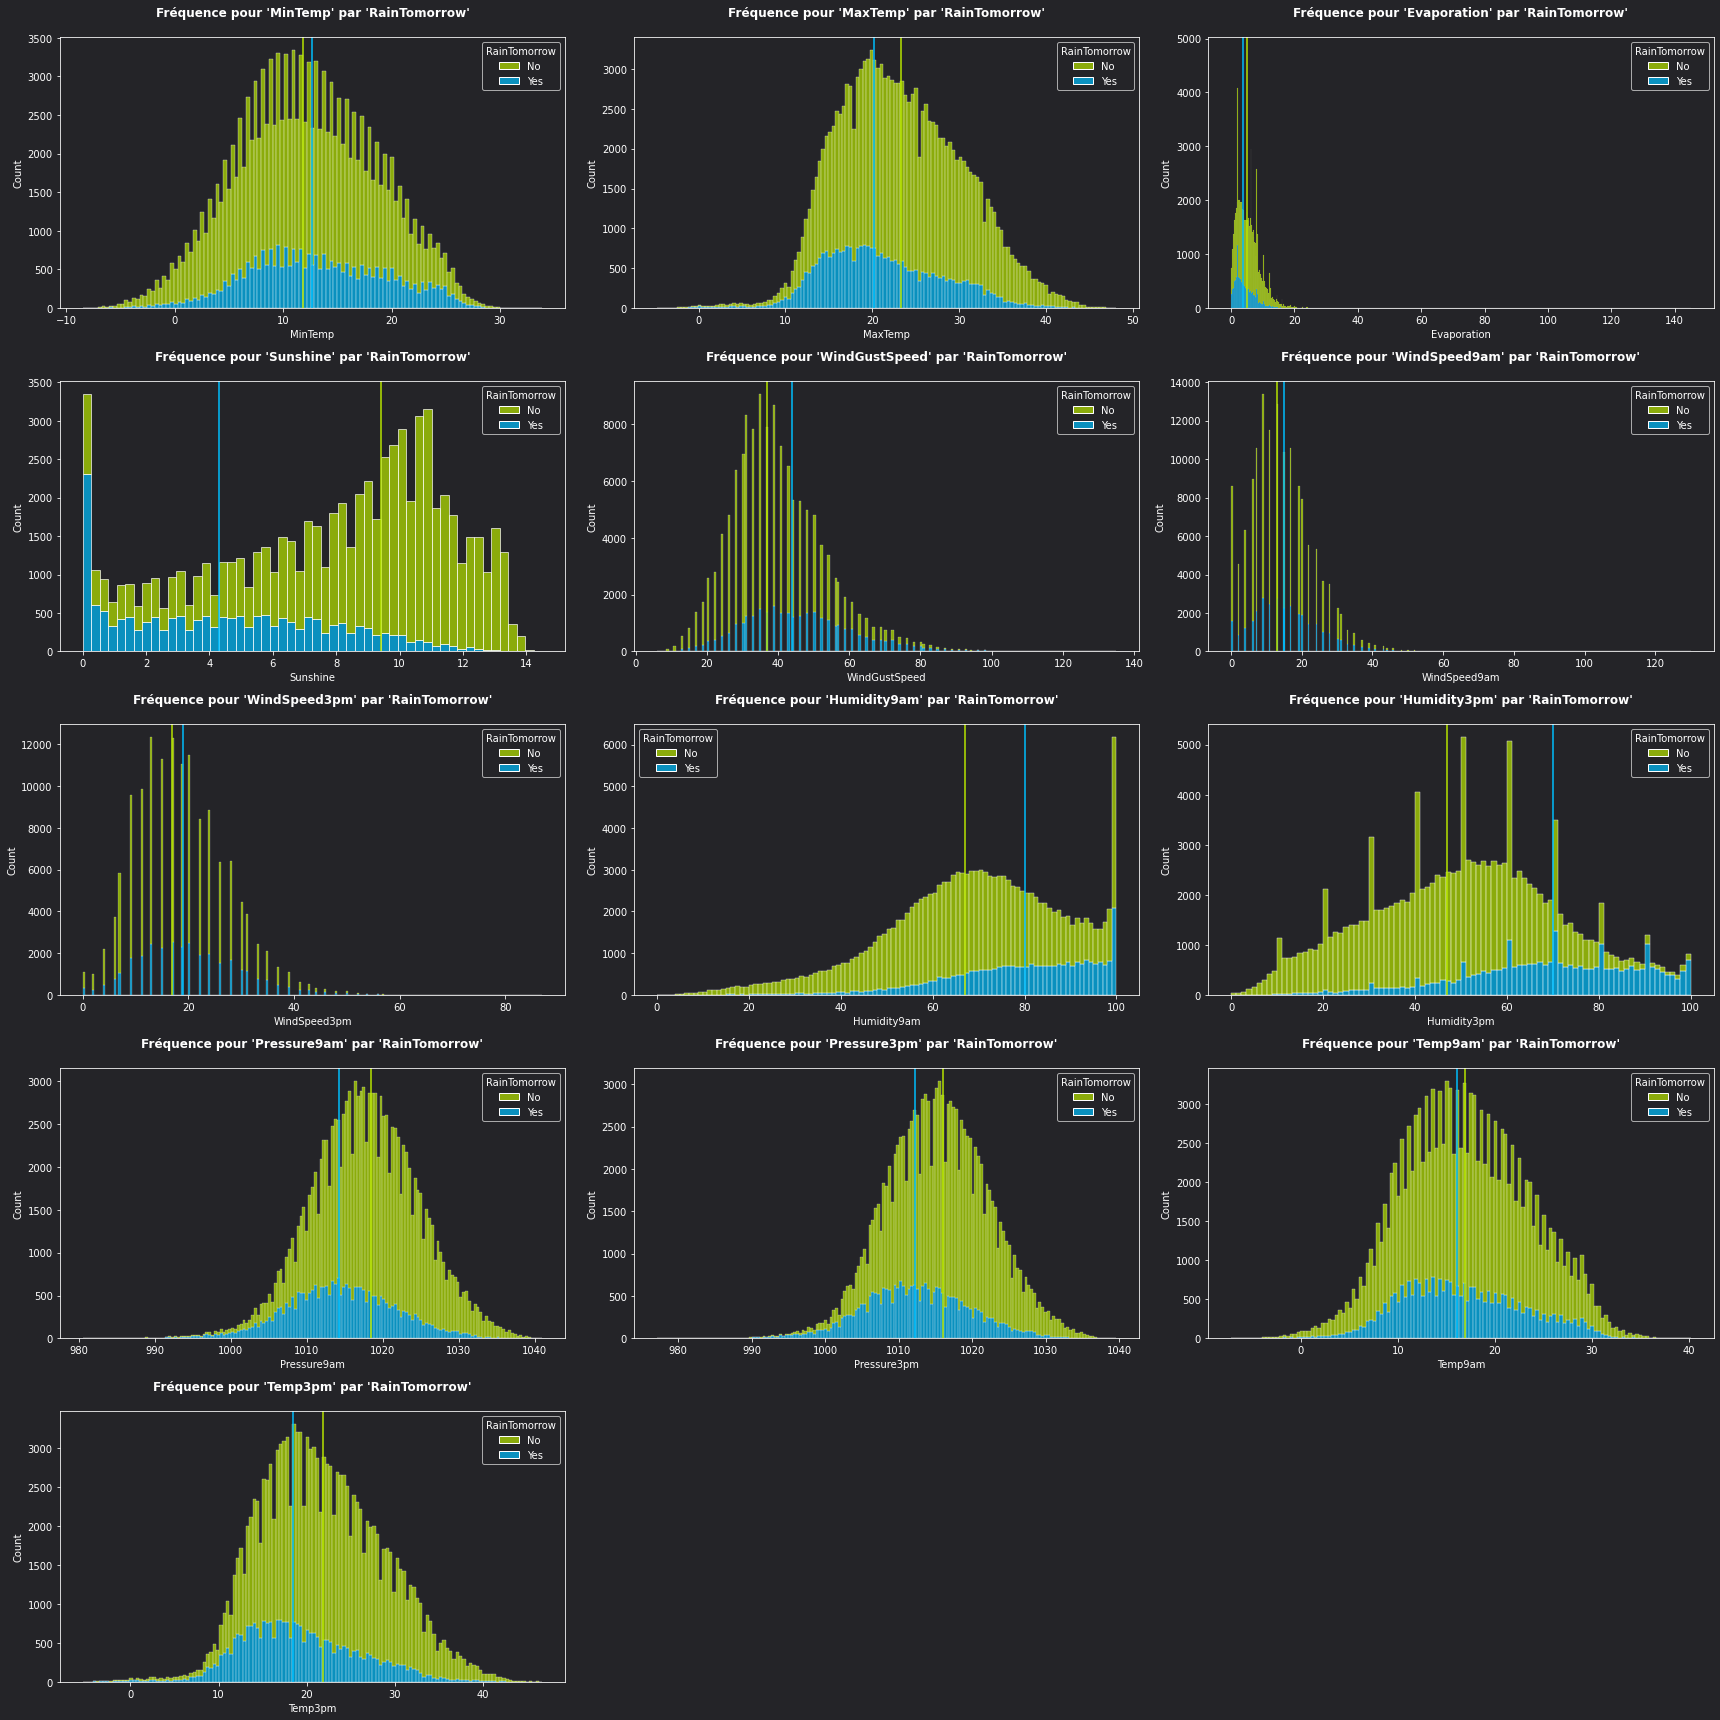

In [172]:
plt.figure(figsize=(24, 24), layout='tight')
for i, col in enumerate(continous) :
    plt.subplot(5, 3, i+1)
    plt.title(f"Fréquence pour '{col}' par '{target}'\n")
    sns.histplot(data=weather_data, x=col, hue=target, hue_order=hue_o, multiple='stack', alpha=.7, palette=palette_c)
    plt.axvline(weather_data.loc[weather_data[target] == 'No', col].median(), c=palette_c[0])
    plt.axvline(weather_data.loc[weather_data[target] == 'Yes', col].median(), c=palette_c[1])

plt.show()

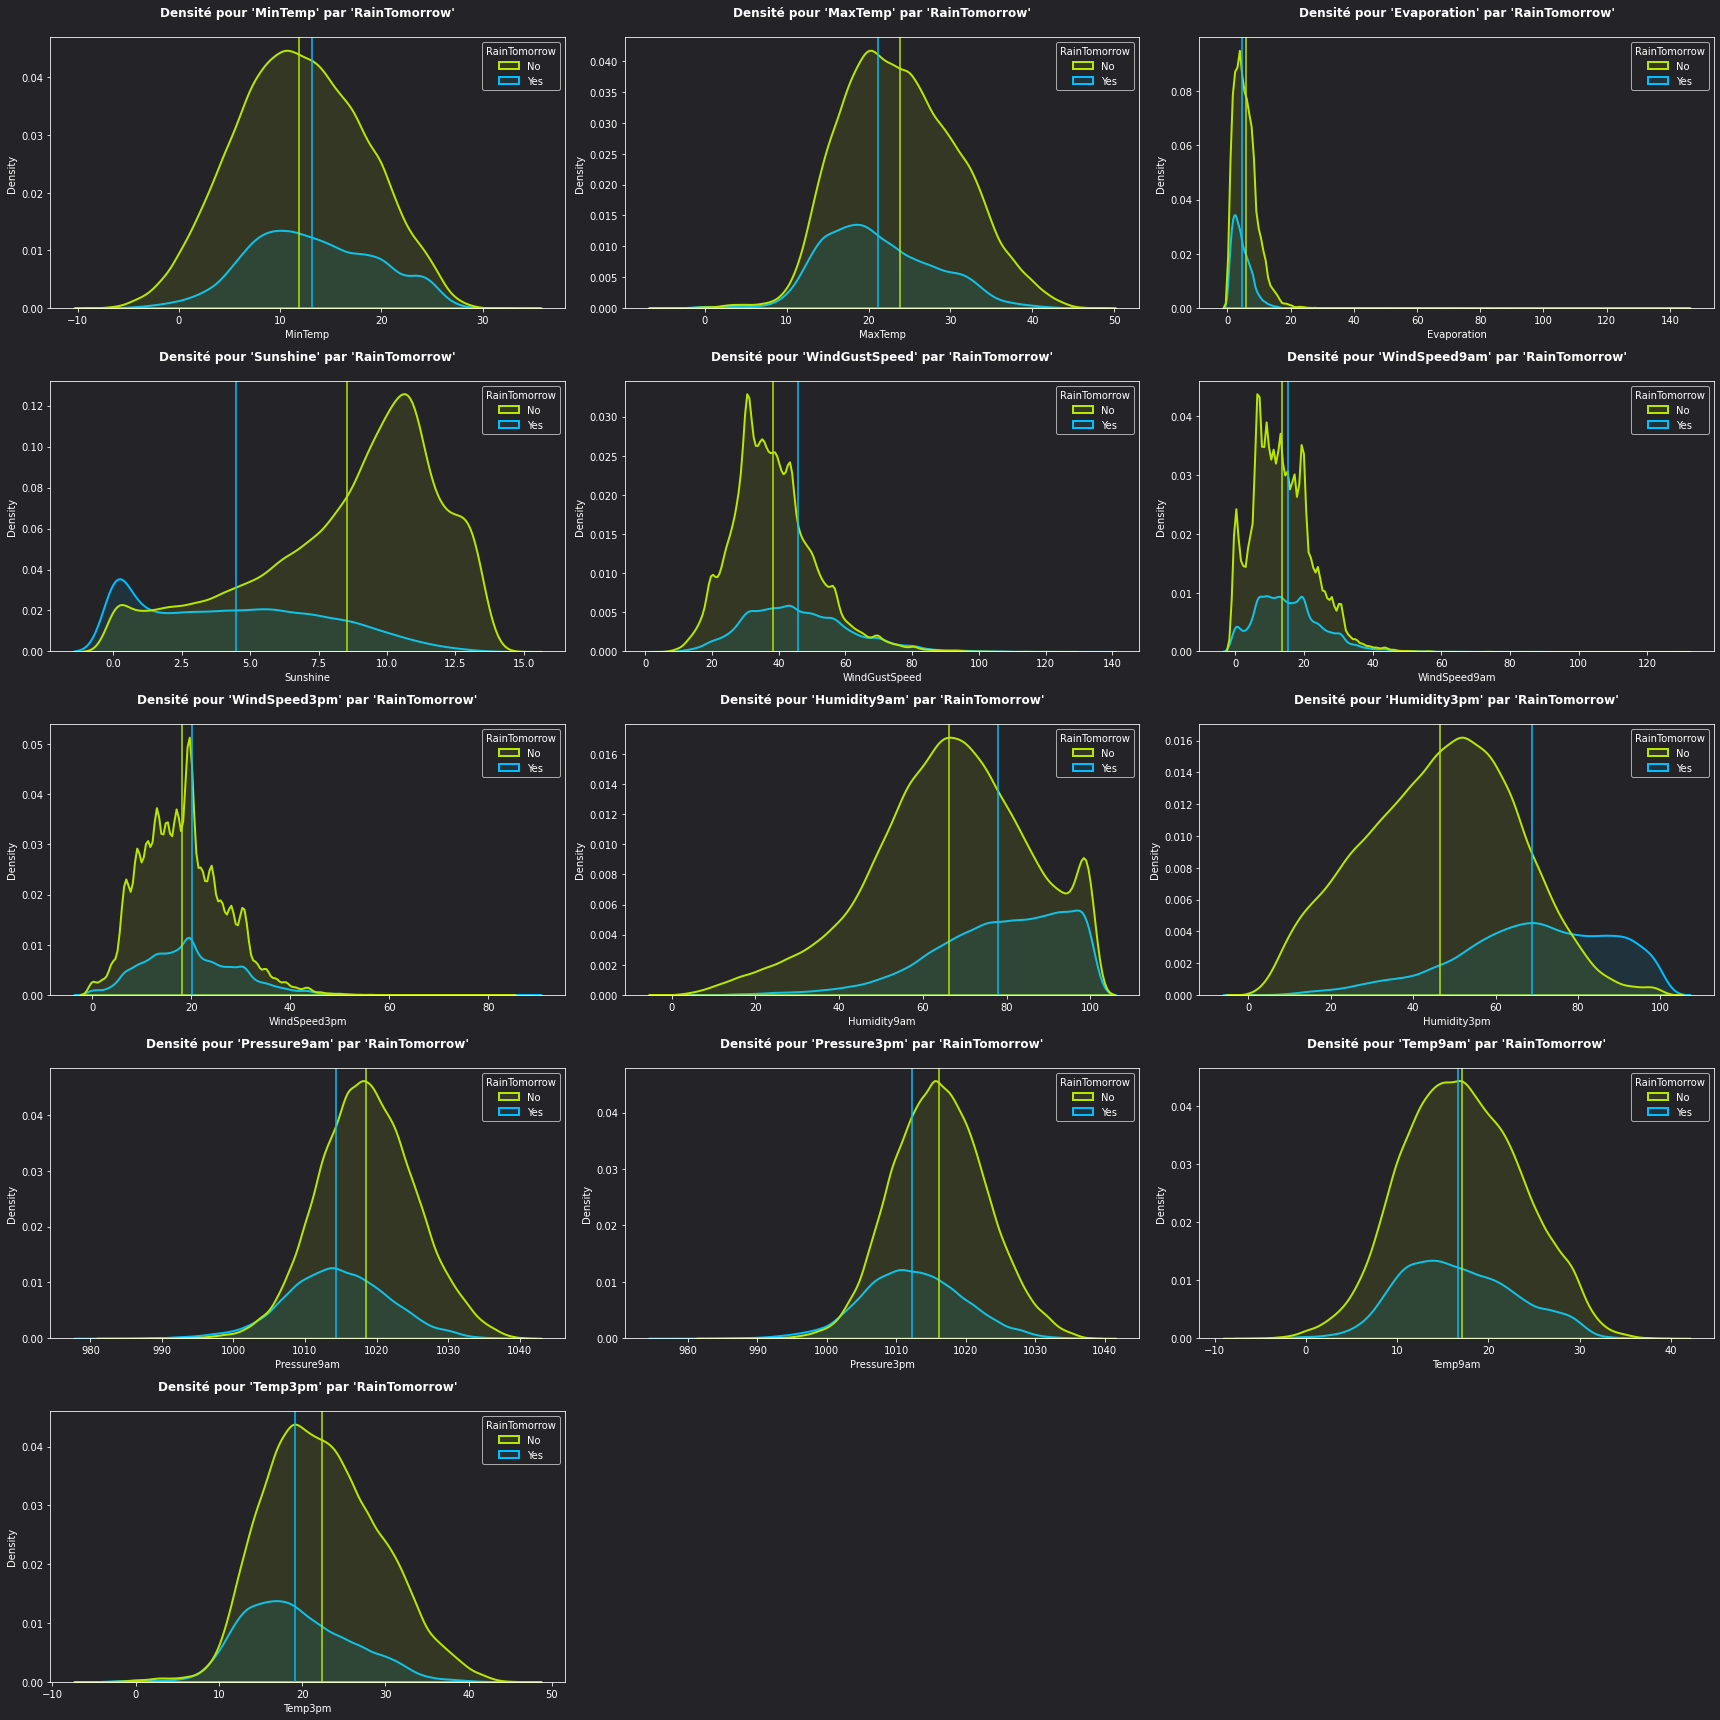

In [173]:
plt.figure(figsize=(24, 24), layout='tight')
for i, col in enumerate(continous) :
    plt.subplot(5, 3, i+1)
    plt.title(f"Densité pour '{col}' par '{target}'\n")
    sns.kdeplot(data=weather_data.sort_values(target), x=col, hue=target, alpha=.1, linewidth=2, fill=True, palette=palette_c)
    plt.axvline(weather_data.loc[weather_data[target] == 'No', col].mean(), c=palette_c[0])
    plt.axvline(weather_data.loc[weather_data[target] == 'Yes', col].mean(), c=palette_c[1])

plt.show()

Détails avec une variable particulière `Humidity3pm`

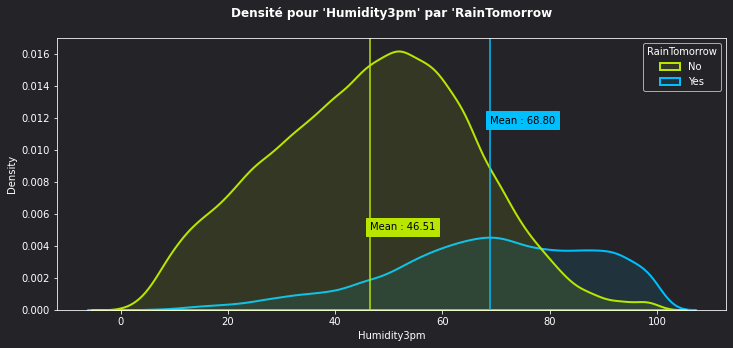

In [13]:
plt.figure(figsize=(12, 5))
plt.title(f"Densité pour 'Humidity3pm' par '{target}\n")
sns.kdeplot(data=weather_data, x='Humidity3pm', hue=target, hue_order=hue_o, alpha=.1, linewidth=2, fill=True, palette=palette_c)

for j, x in enumerate(hue_o) : 
    mean = weather_data.loc[weather_data[target] == x, 'Humidity3pm'].mean()
    plt.axvline(weather_data.loc[weather_data[target] == x, 'Humidity3pm'].mean(), label=f"Mean for {x}", c=palette_c[j])
    # TODO : compute position of y
    plt.text(x=mean, y=0.005+(j/150), s=f"Mean : {mean:.2f}", color='black').set_backgroundcolor(color=palette_c[j]) 

plt.show()

Variable `Rainfall`

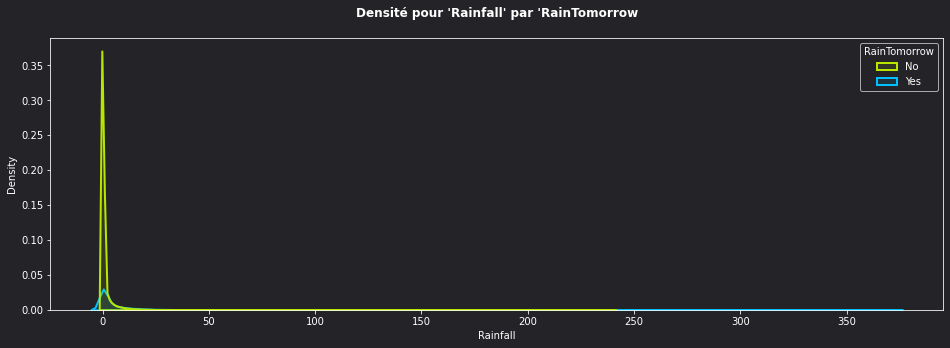

In [174]:
plt.figure(figsize=(16, 5))
plt.title(f"Densité pour 'Rainfall' par '{target}\n")
sns.kdeplot(data=weather_data, x='Rainfall', hue=target, hue_order=hue_o, alpha=.1, linewidth=2, fill=True, palette=palette_c)
plt.show()

Variable `Date`

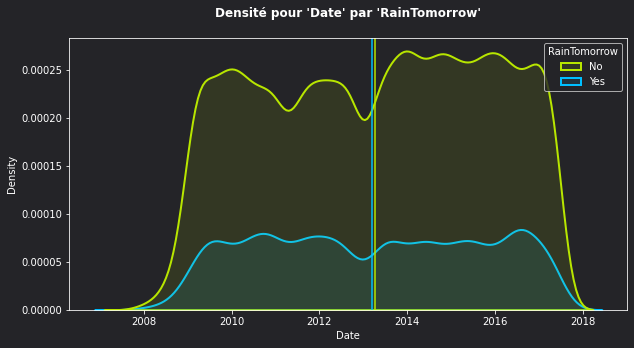

In [44]:
# (!) - See 3.2 with Month and 'Year'
plt.figure(figsize=(10, 5))
plt.title(f"Densité pour 'Date' par '{target}'\n")
sns.kdeplot(data=weather_data.sort_values(target), x='Date', hue=target, alpha=.1, linewidth=2, fill=True, palette=palette_c)
plt.axvline(weather_data.loc[weather_data[target] == 'No', 'Date'].mean(), c=palette_c[0])
plt.axvline(weather_data.loc[weather_data[target] == 'Yes', 'Date'].mean(), c=palette_c[1])
plt.show()

Valeurs aberrantes par cible et valeurs nulles

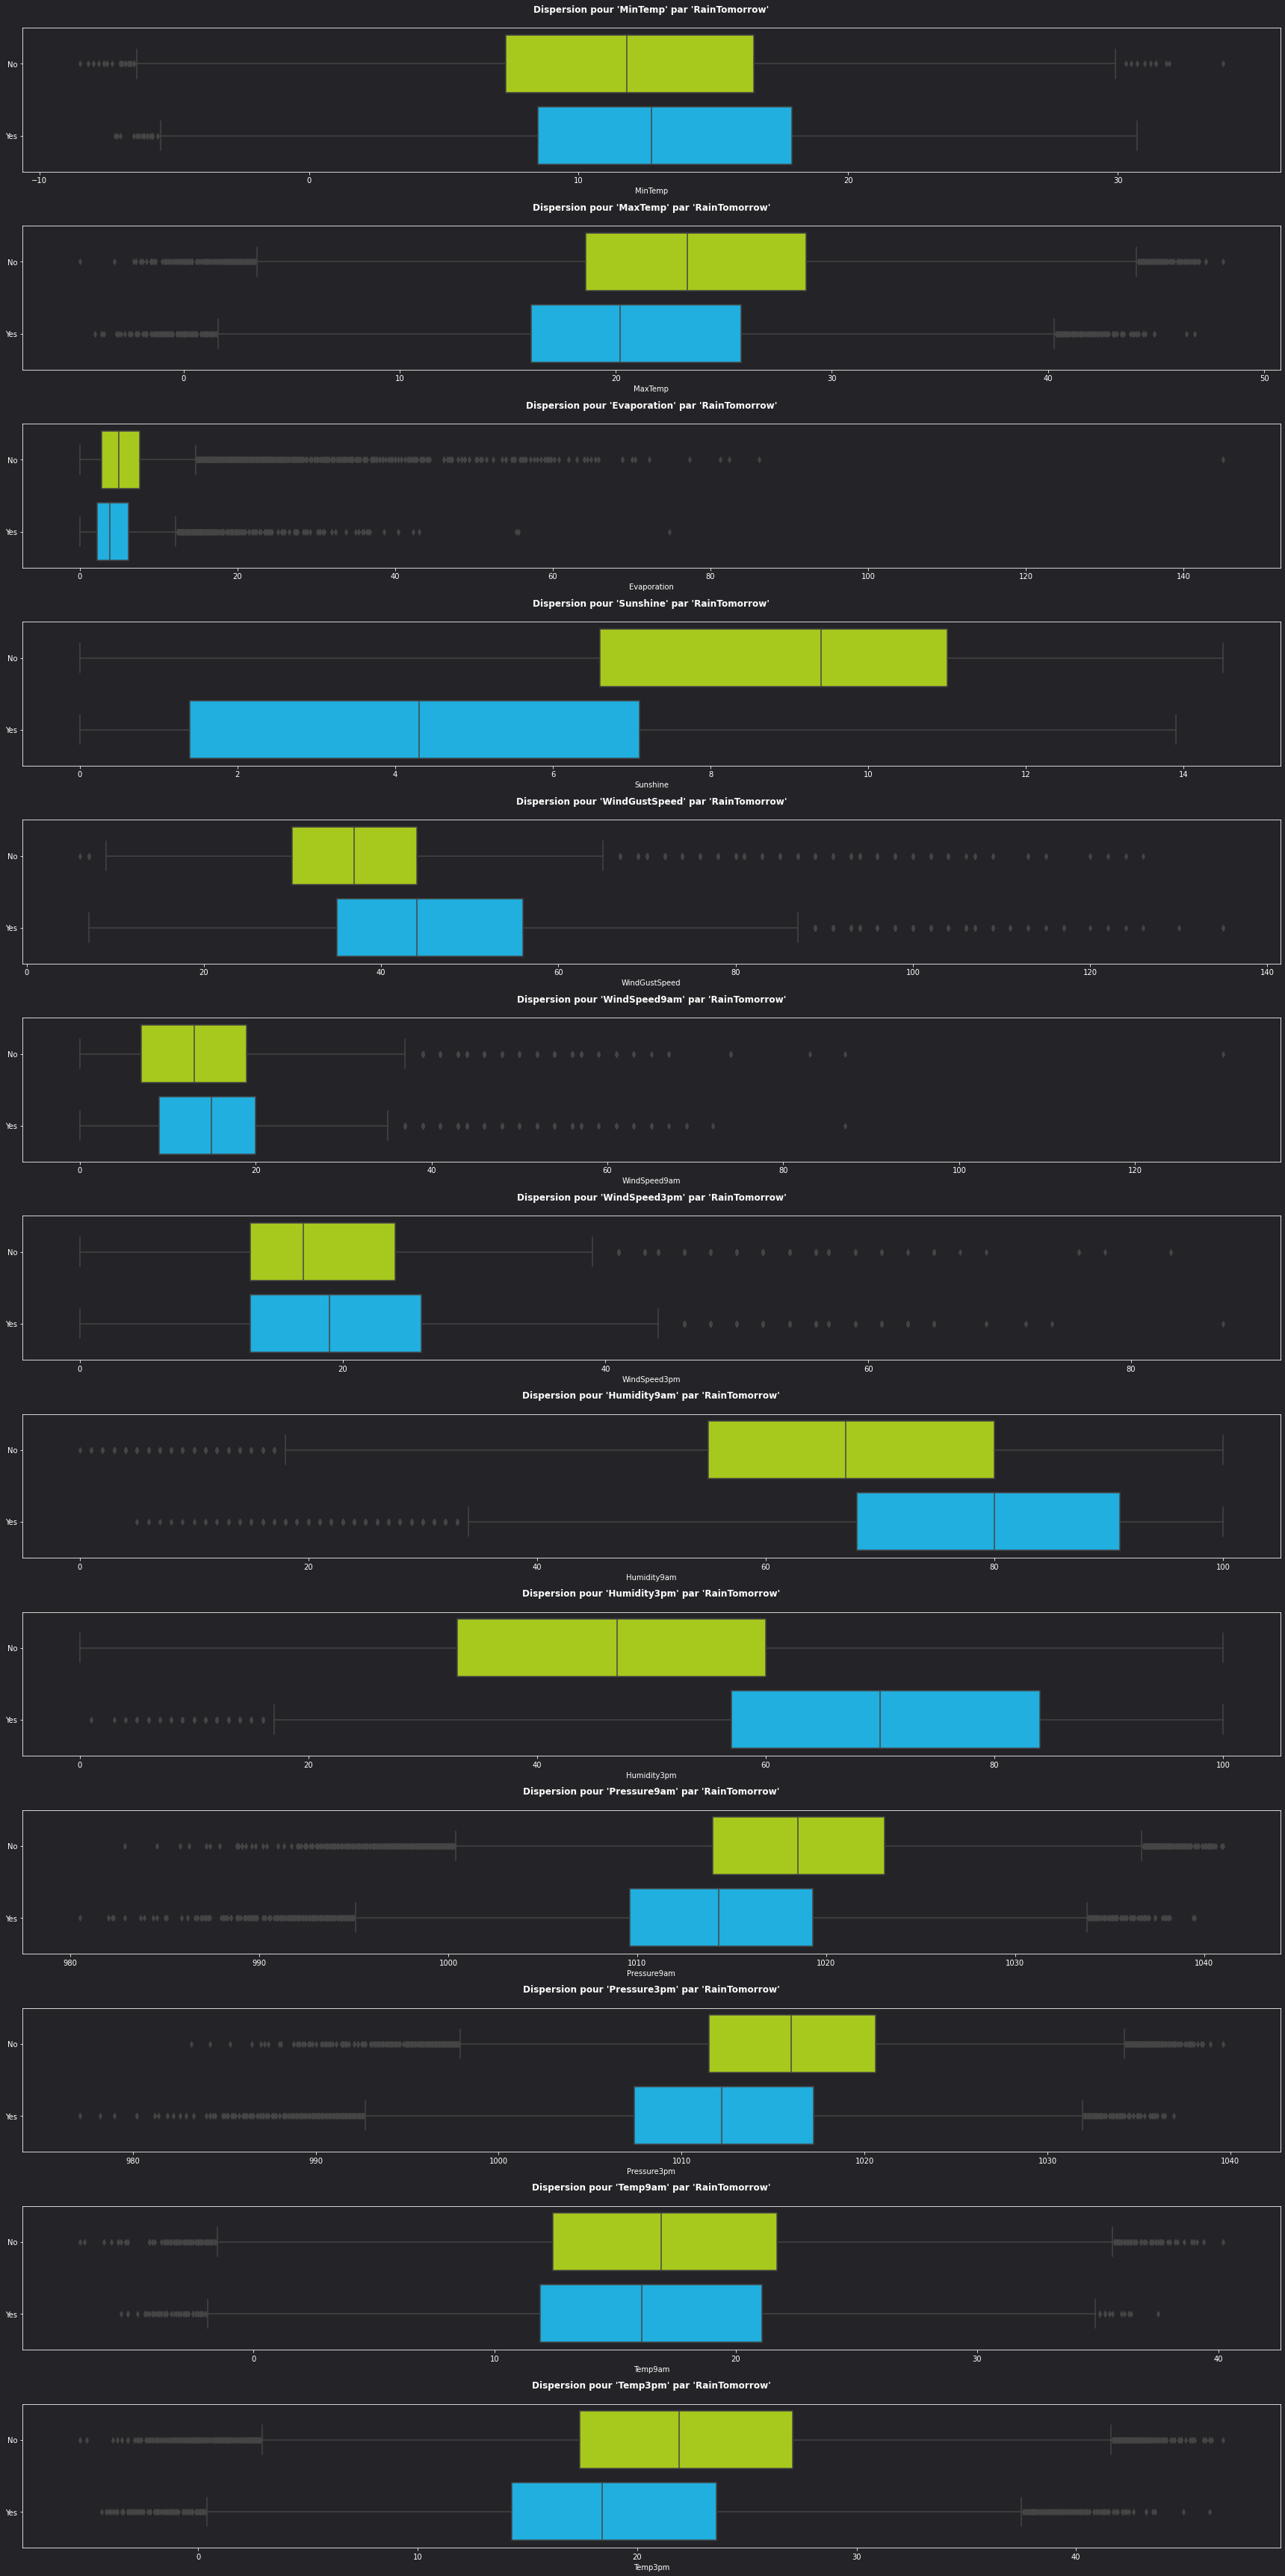

In [175]:
plt.figure(figsize=(24, 48), layout='tight')
for i, col in enumerate(continous) :
    plt.subplot(13, 1, i+1)
    plt.title(f"Dispersion pour '{col}' par '{target}'\n")
    sns.boxplot(data=weather_data.sort_values(target), x=col, y=target, palette=palette_c)
    plt.ylabel('')

plt.show()

Résumé

In [152]:
for col in continous :
    display(weather_data[[col, target]].groupby(target).describe().reset_index())

RainTomorrow   MinTemp                                                 
                   count       mean       std  min  25%   50%   75%   max
0           No  109854.0  11.897675  6.398699 -8.5  7.3  11.8  16.5  33.9
1          Yes   31702.0  13.186890  6.317971 -7.2  8.5  12.7  17.9  30.7

RainTomorrow   MaxTemp                                                  
                   count       mean       std  min   25%   50%   75%   max
0           No  110049.0  23.836247  7.059825 -4.8  18.6  23.3  28.8  48.1
1          Yes   31822.0  21.119100  6.911485 -4.1  16.1  20.2  25.8  46.8

RainTomorrow Evaporation                                               
                     count      mean       std  min  25%  50%  75%    max
0           No     63491.0  5.734807  4.332891  0.0  2.8  5.0  7.6  145.0
1          Yes     17859.0  4.527779  3.469052  0.0  2.2  3.8  6.2   74.8

RainTomorrow Sunshine                                               
                  count      mean       std  min  25%  50%   75%   max
0           No  57556.0  8.546358  3.380298  0.0  6.6  9.4  11.0  14.5
1          Yes  16821.0  4.471761  3.359329  0.0  1.4  4.3   7.1  13.9

RainTomorrow WindGustSpeed                                               \
                       count       mean        std  min   25%   50%   75%   
0           No      103488.0  38.288391  12.406522  6.0  30.0  37.0  44.0   
1          Yes       29435.0  45.946764  15.717954  7.0  35.0  44.0  56.0   

          
     max  
0  126.0  
1  135.0

RainTomorrow WindSpeed9am                                                  
                      count       mean       std  min  25%   50%   75%    max
0           No     109308.0  13.567314  8.627578  0.0  7.0  13.0  19.0  130.0
1          Yes      31537.0  15.508577  9.607733  0.0  9.0  15.0  20.0   87.0

RainTomorrow WindSpeed3pm                                                  
                      count       mean       std  min   25%   50%   75%   max
0           No     108369.0  18.222804  8.455466  0.0  13.0  17.0  24.0  83.0
1          Yes      31194.0  20.078509  9.781914  0.0  13.0  19.0  26.0  87.0

RainTomorrow Humidity9am                                                    
                     count       mean        std  min   25%   50%   75%    max
0           No    109076.0  66.217573  19.020703  0.0  55.0  67.0  80.0  100.0
1          Yes     31343.0  77.983314  16.108377  5.0  68.0  80.0  91.0  100.0

RainTomorrow Humidity3pm                                                    
                     count       mean        std  min   25%   50%   75%    max
0           No    107670.0  46.510625  18.489476  0.0  33.0  47.0  60.0  100.0
1          Yes     30913.0  68.800019  19.037409  1.0  57.0  70.0  84.0  100.0

RainTomorrow Pressure9am                                                \
                     count         mean       std    min     25%     50%   
0           No     99405.0  1018.595599  6.760700  982.9  1014.0  1018.5   
1          Yes     28774.0  1014.400000  7.304373  980.5  1009.6  1014.3   

                   
      75%     max  
0  1023.1  1041.0  
1  1019.3  1039.5

RainTomorrow Pressure3pm                                                \
                     count         mean       std    min     25%     50%   
0           No     99448.0  1016.113587  6.710292  983.2  1011.5  1016.0   
1          Yes     28764.0  1012.300820  7.331664  977.1  1007.4  1012.2   

                   
      75%     max  
0  1020.6  1039.6  
1  1017.2  1036.9

RainTomorrow   Temp9am                                                  
                   count       mean       std  min   25%   50%   75%   max
0           No  109710.0  17.077001  6.522764 -7.2  12.4  16.9  21.7  40.2
1          Yes   31579.0  16.676598  6.378134 -5.5  11.9  16.1  21.1  37.5

RainTomorrow   Temp3pm                                                  
                   count       mean       std  min   25%   50%   75%   max
0           No  108332.0  22.402905  6.850466 -5.4  17.4  21.9  27.1  46.7
1          Yes   31135.0  19.197113  6.657981 -4.4  14.3  18.4  23.6  46.1

Dépendances dans les dispersions

In [153]:
# [!] - Need ~118 min. to draw - [!]
if False :
    gd = sns.PairGrid(weather_data[continous + [target]], diag_sharey=False, corner=True, hue=target, hue_order=hue_o, height=5, palette=palette_c)
    gd.map_lower(sns.kdeplot)
    gd.map_diag(sns.kdeplot)

**Observations**

> —
> 
> ❕ Les variables `Temp9am` et `Temp3pm`, `MinTemp` et `MaxTemp` et `Sunshine` présentent une très faible différence d'écart-types entre les 'Yes'/'No'. 
> 
> —

##### **3.2** - Variables quantitatives discrètes

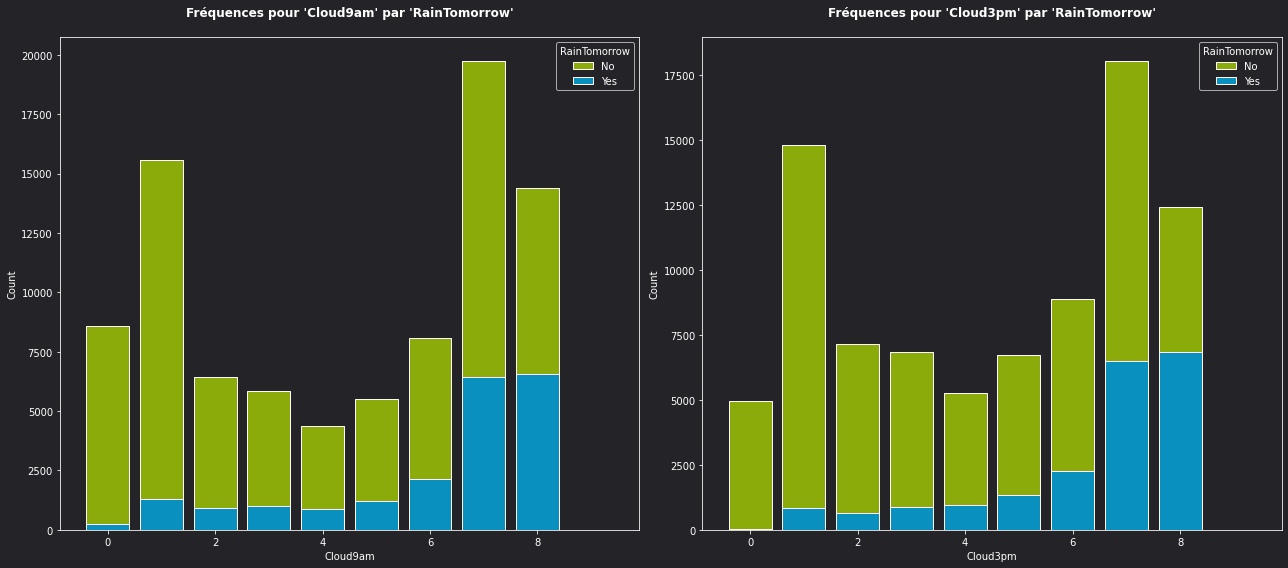

In [176]:
plt.figure(figsize=(18, 8), layout='tight')
for i, col in enumerate(discretes) :
    plt.subplot(1, 2, i+1)
    plt.title(f"Fréquences pour '{col}' par '{target}'\n")
    sns.histplot(data=weather_data, x=col, hue=target, hue_order=hue_o, multiple='stack', alpha=.7, discrete=True, shrink=.8, palette=palette_c)
plt.show()

In [155]:
for col in discretes :
    display(weather_data[[col, target]].groupby(target).describe().reset_index())

RainTomorrow Cloud9am                                             
                  count      mean       std  min  25%  50%  75%  max
0           No  67914.0  3.932282  2.877299  0.0  1.0  4.0  7.0  9.0
1          Yes  20622.0  6.099990  2.216997  0.0  5.0  7.0  8.0  8.0

RainTomorrow Cloud3pm                                             
                  count      mean       std  min  25%  50%  75%  max
0           No  64811.0  3.921896  2.667284  0.0  1.0  4.0  7.0  9.0
1          Yes  20288.0  6.360065  1.947514  0.0  6.0  7.0  8.0  8.0

Variables `Month` et `Year` par `RainToday` 

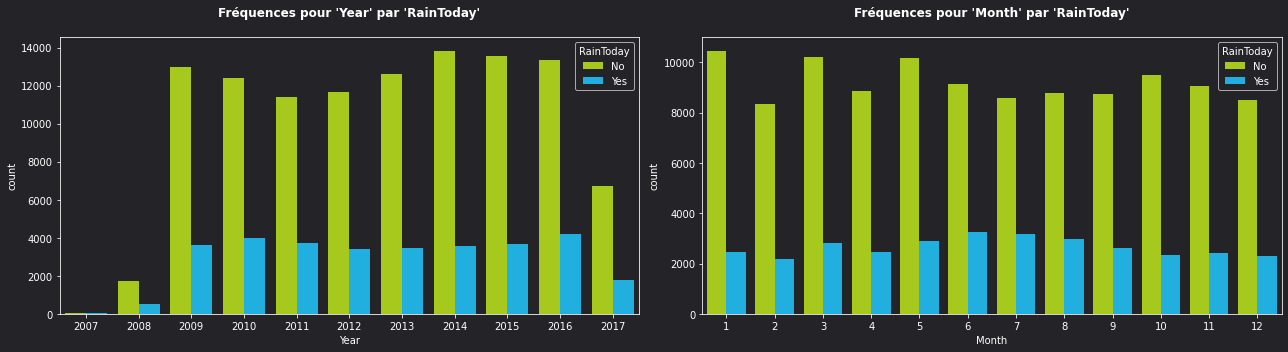

In [20]:
hue = 'RainToday'
plt.figure(figsize=(18, 5), layout='tight')
for i, col in enumerate(periods) :
    plt.subplot(1, 2, i+1)
    plt.title(f"Fréquences pour '{col}' par '{hue}'\n")
    sns.countplot(data=weather_data, x=col, hue=hue, hue_order=hue_o, palette=palette_c)
plt.show()

In [47]:
for col in periods :
    display(weather_data[[col, target]].groupby(target).describe().reset_index())

RainTomorrow      Year                                                 \
                   count         mean       std     min     25%     50%   
0           No  110316.0  2012.775373  2.539596  2007.0  2011.0  2013.0   
1          Yes   31877.0  2012.702011  2.546212  2007.0  2010.0  2013.0   

                   
      75%     max  
0  2015.0  2017.0  
1  2015.0  2017.0

RainTomorrow     Month                                              
                   count      mean       std  min  25%  50%  75%   max
0           No  110316.0  6.389046  3.462901  1.0  3.0  6.0  9.0  12.0
1          Yes   31877.0  6.449258  3.297078  1.0  4.0  6.0  9.0  12.0

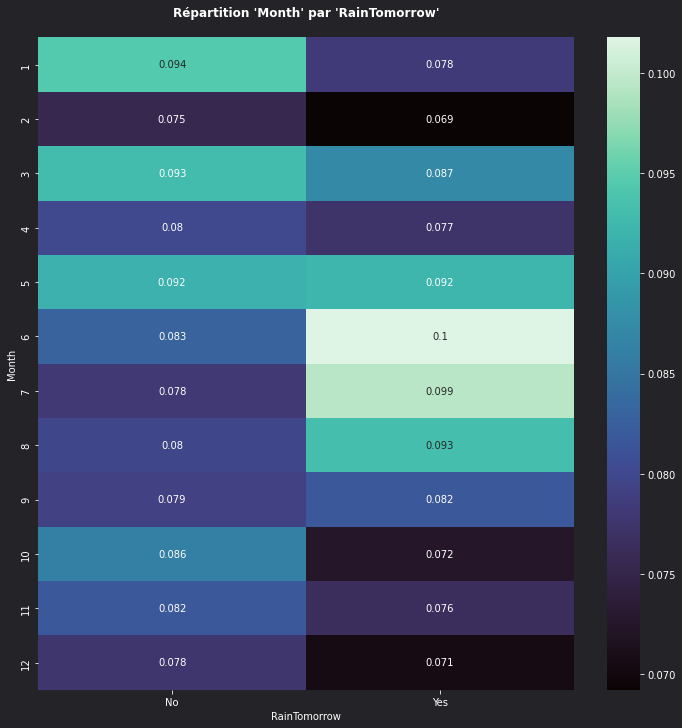

In [48]:
plt.figure(figsize=(12, 12))
ctb = pd.crosstab(weather_data['Month'], weather_data[target], normalize='columns')
plt.title(f"Répartition 'Month' par '{target}'\n")
sns.heatmap(ctb, annot=True, cmap='mako')
plt.show()

**Observations**

> —
> 
> ❕ Les distributions de `Cloud9am` et `Cloud3pm` par `RainTomorrow` ne présentent pas de grandes différences. 
>
> ❕ La variable `Year` ne présente pas de _pic_ de pluie, et comporte seulement moins de valeurs aux années '2007', '2008' et '2017'. La fréquence des pluies pour la variable `Month` est légèrement plus fréquentes en juin et juillet.
> 
> —

##### **3.3** - Variables qualitatives

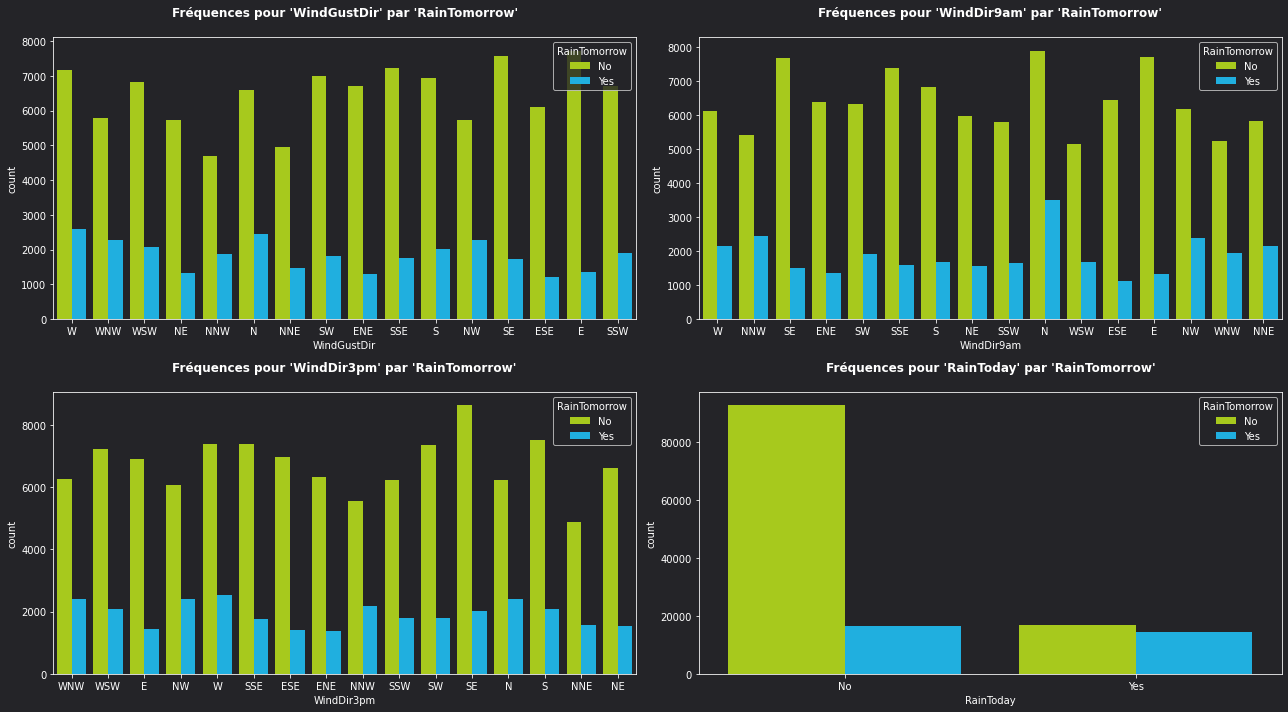

In [45]:
plt.figure(figsize=(18, 10), layout='tight')
for i, col in enumerate(categoricals) :
    plt.subplot(2, 2, i+1)
    plt.title(f"Fréquences pour '{col}' par '{target}'\n")
    sns.countplot(data=weather_data, x=col, hue=target, hue_order=hue_o, palette=palette_c)
plt.show()

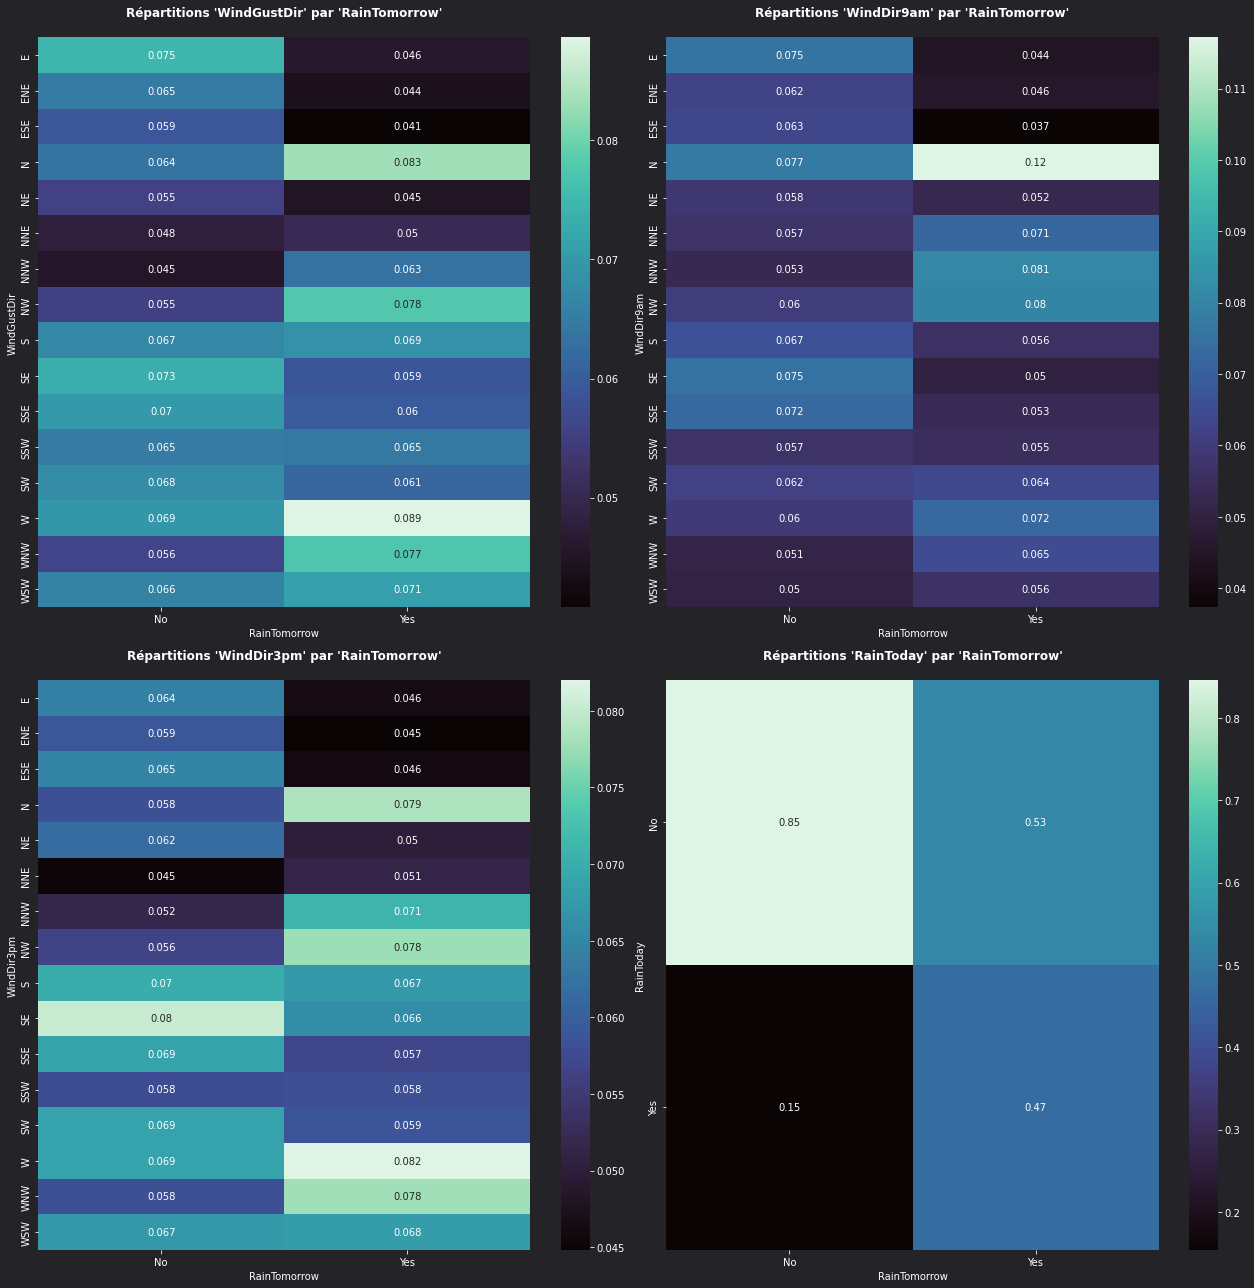

In [178]:
plt.figure(figsize=(18, 18), layout='tight')
for i, col in enumerate(categoricals) :
    ctb = pd.crosstab(weather_data[col], weather_data[target], normalize='columns')
    plt.subplot(2, 2, i+1)
    plt.title(f"Répartitions '{col}' par '{target}'\n")
    sns.heatmap(ctb, annot=True, cmap='mako')
plt.show()

Variable `Location`

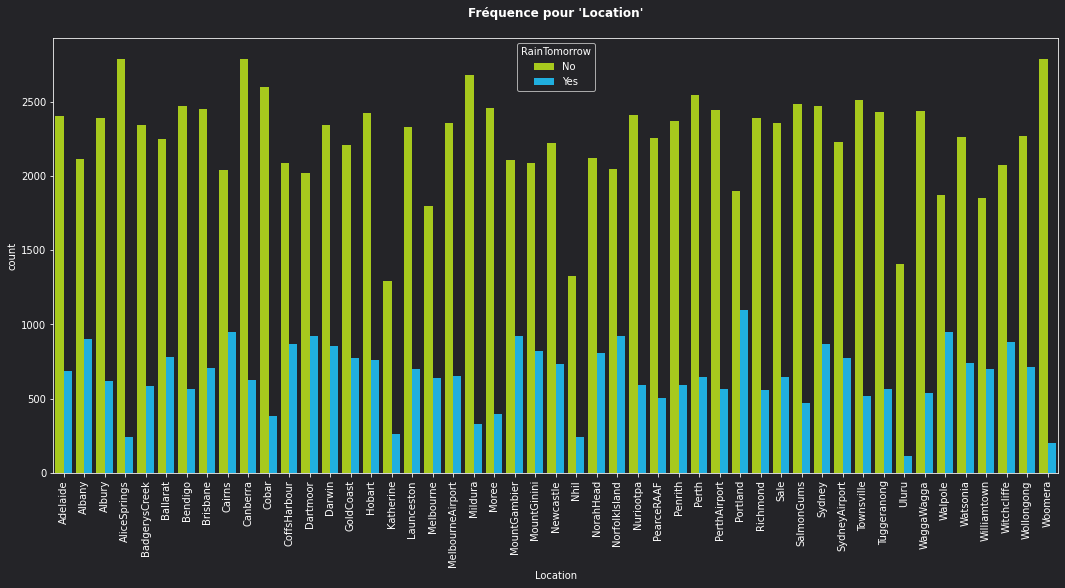

In [179]:
# (!) - Location
plt.figure(figsize=(18, 8))
plt.title(f"Fréquence pour 'Location'\n")
sns.countplot(data=weather_data.sort_values('Location'), x='Location', hue=target, hue_order=hue_o, palette=palette_c)
plt.xticks(rotation=90)
plt.show()

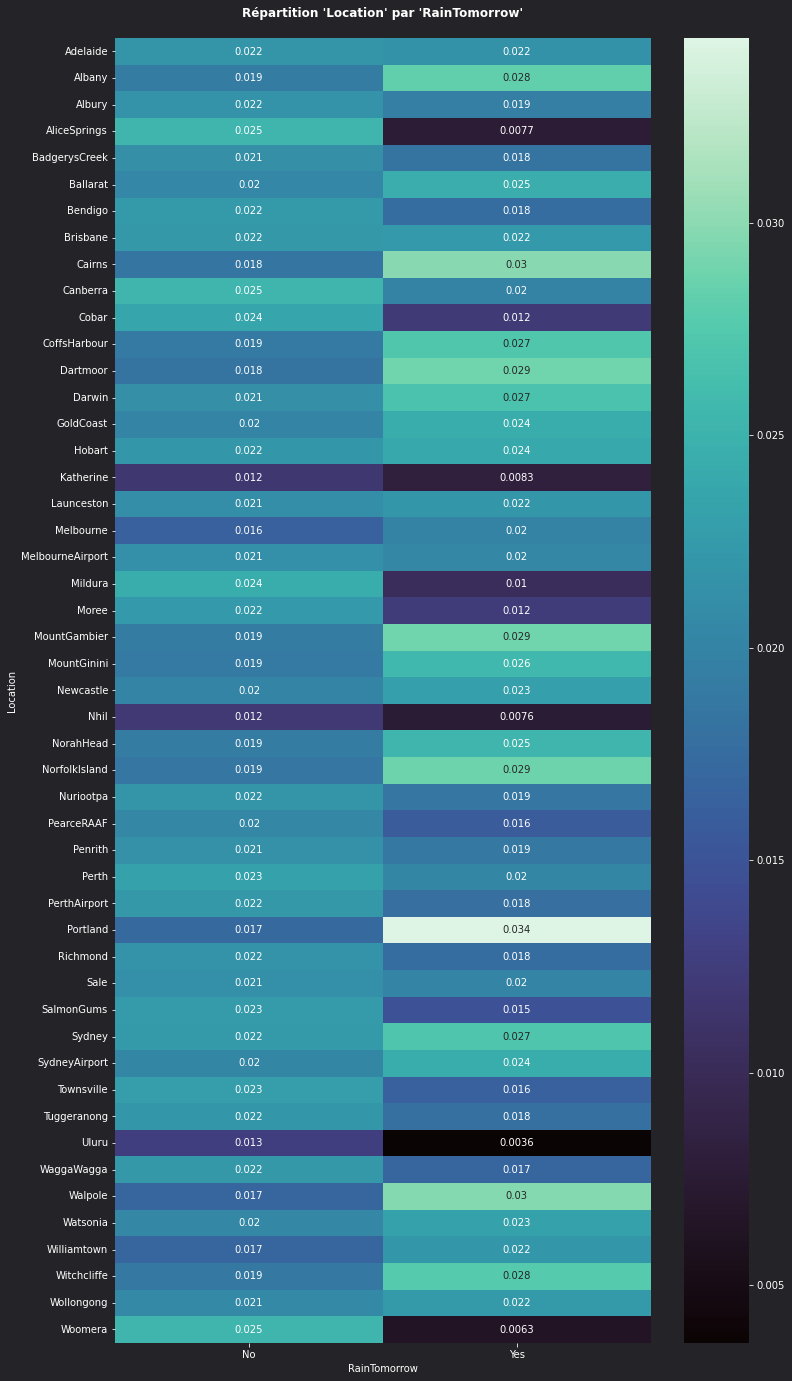

In [180]:
plt.figure(figsize=(12, 24))
ctb = pd.crosstab(weather_data['Location'], weather_data[target], normalize='columns')
plt.title(f"Répartition 'Location' par '{target}'\n")
sns.heatmap(ctb, annot=True, cmap='mako')
plt.show()

Variable `Location` = _Sydney_ | _SydneyAirport_ et _Melbourne_ | _MelbournAirport_

In [ ]:
if draw :
    plt.figure(figsize=(10, 5))
    plt.title(f"Densité pour 'Syndey' et 'SydneyAirport' par '{target}'\n")
    sns.histplot(data=sydney, x='Location', hue='RainTomorrow', hue_order=hue_o, multiple='stack', alpha=.7, palette=palette_c)
    plt.show()

In [ ]:
if draw :
    plt.figure(figsize=(10, 5))
    plt.title(f"Densité pour 'Melbourne' et 'MelbournAirport' par '{target}'\n")
    sns.histplot(data=melbourne, x='Location', hue='RainTomorrow', hue_order=hue_o, multiple='stack', alpha=.7, palette=palette_c)
    plt.show()

**Observations**

> —
> 
> ❕ La variables `RainToday` est très intéressante. La ville de **Woomera** enregistre une forte distinction de pluie comparativement aux autre villes. Les autres variables, ne présentent pas de distinction extrêmement marquée, hormis quand le vent vient du **N** à **9pm**.
> 
> —

##### **3.4** - Statistiques

In [22]:
# (!) - Adjustments for computing
no_yes_v = {
    'No': 0, 
    'Yes': 1
}
weather_stats = weather_data.copy()
weather_stats[target] = weather_stats[target].map(no_yes_v)
weather_stats['RainToday'] = weather_stats['RainToday'].map(no_yes_v)

weather_corr = weather_stats.corr(method='pearson')

Liens de corrélations

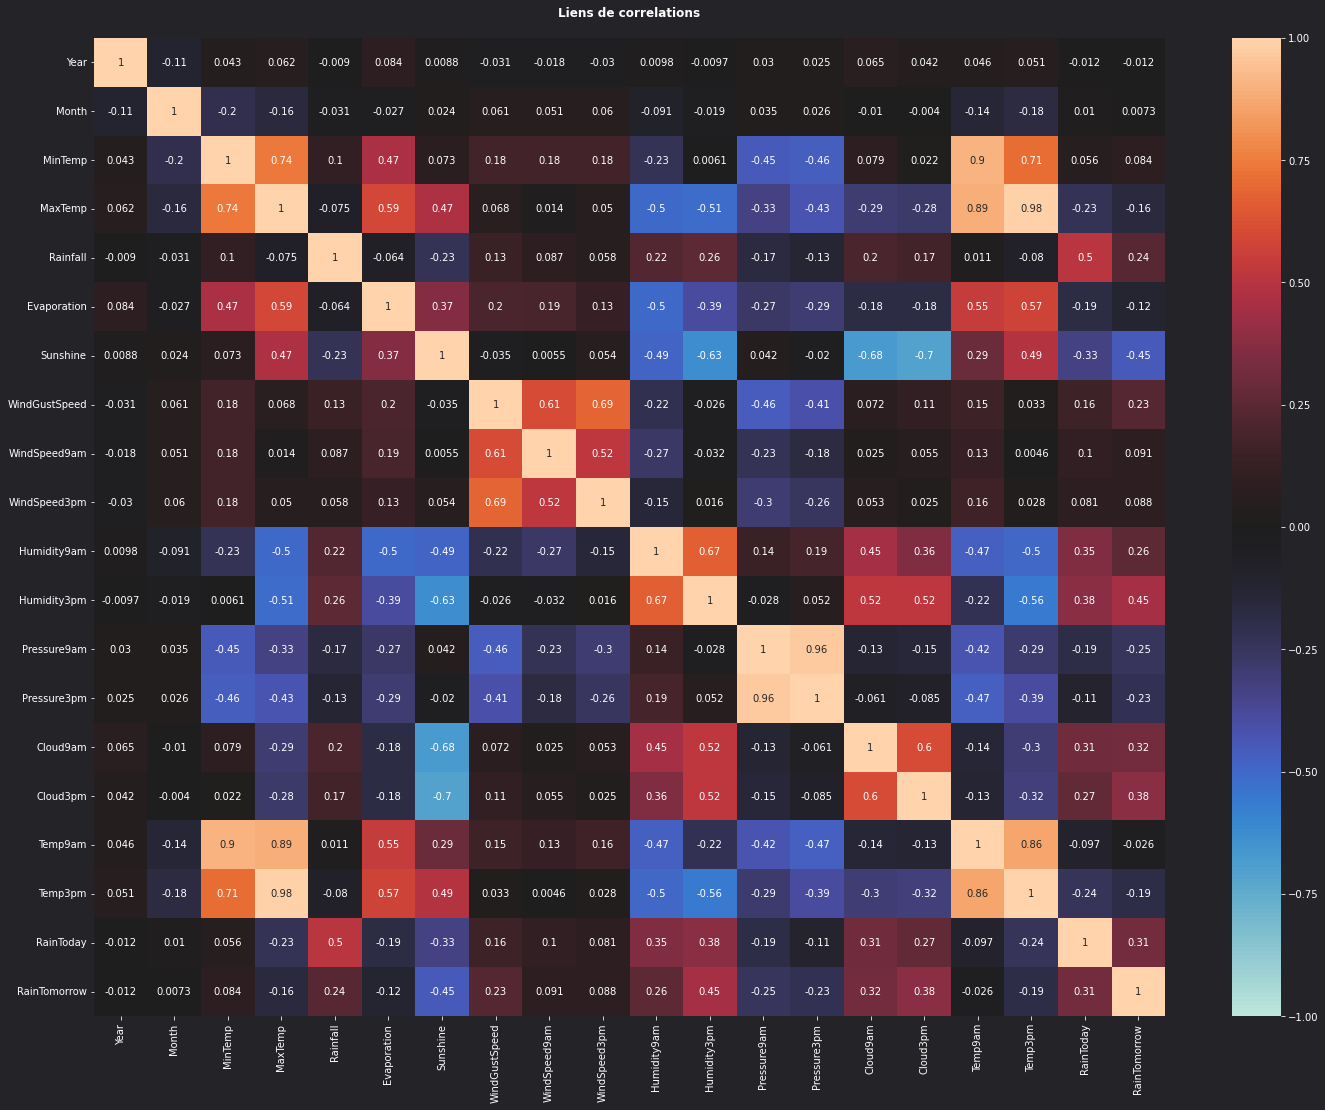

In [63]:
plt.figure(figsize=(24, 18))
plt.title("Liens de correlations\n")
sns.heatmap(weather_corr, vmin=-1, vmax=1, cmap="icefire", annot=True)
plt.show()

In [64]:
# (!) - List low correlations with 'RainTomorrow'
low_corr = weather_corr.loc[(weather_corr[target] > -0.15) & (weather_corr[target] < 0.15), target]
pd.DataFrame({
    'Correlations faibles avec la cible': low_corr.sort_values(ascending=False)
})

,Correlations faibles avec la cible
WindSpeed9am,0.090995
WindSpeed3pm,0.087817
MinTemp,0.083936
Month,0.007328
Year,-0.012039
Temp9am,-0.025691
Evaporation,-0.119285


Résumé

In [65]:
std_by_target = weather_stats.groupby(target).std()
std_by_target.reset_index(inplace=True)

std_by_target = std_by_target.T

std_by_target.rename(columns={0:'RainTomorow No', 1:'RainTomorow Yes'}, inplace=True)

std_by_target['Différences Yes/No'] = std_by_target['RainTomorow No'] - std_by_target['RainTomorow Yes']
std_by_target['Correlations RainTomorrow'] = weather_corr[target]

std_by_target.sort_values('Correlations RainTomorrow')

,RainTomorow No,RainTomorow Yes,Différences Yes/No,Correlations RainTomorrow
Sunshine,3.380298,3.359329,0.020969,-0.450768
Pressure9am,6.760700,7.304373,-0.543672,-0.246371
Pressure3pm,6.710292,7.331664,-0.621372,-0.226031
Temp3pm,6.850466,6.657981,0.192485,-0.192424
MaxTemp,7.059825,6.911485,0.148340,-0.159237
Evaporation,4.332891,3.469052,0.863839,-0.119285
Temp9am,6.522764,6.378134,0.144629,-0.025691
Year,2.539596,2.546212,-0.006617,-0.012039
Month,3.462901,3.297078,0.165824,0.007328
MinTemp,6.398699,6.317971,0.080728,0.083936


In [ ]:
# (!) - Is correlation better with mean between 'Pressure9am' / 'Pressure3pm' ? 
if draw : 
    weather_stats['PressureMean'] = np.nan
    weather_stats['PressureMean'] = weather_stats[['Pressure9am', 'Pressure3pm']].mean(axis=1)

    plt.figure(figsize=(10, 8))
    plt.title("Correlations pour 'Pressure9am/3pm' et une moyenne des 'Pressure9am/3pm'\n")
    sns.heatmap(weather_stats[['Pressure9am', 'Pressure3pm', 'PressureMean', target]].corr(method='pearson'), vmin=-1, vmax=1, cmap="icefire", annot=True)
    plt.show()

In [ ]:
# x_X .. Darwin June 2017
if draw :
    display(weather_data.loc[(weather_data['Location'] == 'Darwin') & (weather_data['Year'] == 2017), ['Year', 'Month', 'Location', 'RainToday']].sort_values('Month', ascending=False))

**Observations**

> — 
>
> ❕ Les corrélations de `Cloud9am` et `Cloud3pm` avec la cible sont presque semblables, et leurs distributions également. Une moyenne ne sera pas nécessaire, et la variable `Cloud9am` pourrait tout simplement être supprimée. 
>
> ❕ La variable `Pressure9am` est _étrangement_ plus corrélée avec la cible que `Pressure3pm`, et leurs distributions et statistiques sont pratiquement équivalentes.
> 
> ❕ Les variables `Year`, `Month`, `WindSpeed9am`, `WindSpeed3pm`, `MinTemp`, `Temp9am` et `Evaporation` sont faiblement corrélées avec la cible.
>
> — 

_By Elodie M. R. R. G. Bayet_

---

### **4.** Finalisation

##### **4.1** - Conclusion

**Suppressions**

✔️ Les variables qui contiennent des **mesures météo enregistrées à 15h00** sont _forcément_ plus pertinentes pour indiquer s'il va pleuvoir le lendemain. Elles seront donc à privilégier sur celles qui contiennent des **mesures météo enregistrées à 9h00**.

* `Rainfall` => statistiques et distribution farfelues
* `Temp9am` => faible différence d'écart-types entre 'Yes'/'No', faible corrélation avec la cible
* `MinTemp` => faible différence d'écart-types entre 'Yes'/'No', faible corrélation avec la cible
* `WinSpeed9am` et `WinSpeed3pm` => faibles corrélations avec la cible, distinction de 'Yes'/'No' dans la distribution moins marquée qu'avec `WindGustSpeed`
* `Humidity9am` => moins corrélée que `Humidity3pm`
* `Cloud9am` => moins corrélée que `Cloud3pm`
* `Pressure9am` et `Pressure3pm` => création d'une moyenne des valeurs, puisque la 1<sup>re</sup> variable est étrangement plus corrélée avec la cible que sa suivante, et que leurs distributions et statistiques sont pratiquement équivalentes.
* `WindDir9am` => puisque les valeurs `WindDir3pm` sont plus proche du du lendemain
* `Date`, `Year` et `Month` => n'ont pas de fréquences de pluie plus ou moins abondantes selon les mois et les années, hormis une légère corrélation avec `MaxTemp` et `Temp3pm`

✔️ Les variables `Temp3pm` et `MaxTemp` sont bien corrélées avec la cible mais présentent une distribution sensiblement similaire.

* `MaxTemp` => corrélation plus faible avec la cible

⭕️ Certaines **variables** necessitent **trop de temps**

* Colonnes `Location`, `WindGustDir` et `WindDir3pm` => simplifier l'encodage

**Preprocessing**

✔️ `RainToday` et `RainTomorrow` : suppression des lignes contenant des valeurs nulles

✔️ `RainToday` : encodage catégoriel 0 / 1.

✔️ `resample()` : Down-Resampling par `RainTomorrow` = 'No'

In [43]:
# (!) - 0.9981721753953973
train_default = pd.read_csv('./_outputs/cm_train_no_resampled.csv')
train_default.rename(columns={'Unnamed: 0': 'Train default'}, inplace=True)

train_default

,Train default,Predict. Yes,Predict. No
0,True Yes,23225,8
1,True No,8,82172


In [44]:
# (!) - 0.7759752251612353
test_default = pd.read_csv('./_outputs/cm_test_no_resampled.csv')
test_default.rename(columns={'Unnamed: 0': 'Test default'}, inplace=True)

test_default

,Test default,Predict. Yes,Predict. No
0,True Yes,3967,4061
1,True No,4061,23345


##### **4.2** - Traitement

**Préparation**

In [45]:
# (!) - Drop columns
to_drop = ['Date', 'Year', 'Month', 'Rainfall', 'Temp9am', 'MinTemp', 'MaxTemp', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Cloud9am', 'WindDir9am']
weather_prepared = weather_data.drop(columns=to_drop)

In [46]:
# (!) - DELETION BECAUSE OF DELAY !
weather_prepared.drop(columns=['Location', 'WindGustDir', 'WindDir3pm'], inplace=True)

In [47]:
# (!) - Transform 'Pressures'
weather_prepared.insert(loc=6, column='Pressure', value=np.nan)
weather_prepared['Pressure'] = weather_prepared[['Pressure9am', 'Pressure3pm']].mean(axis=1)

weather_prepared.drop(columns=['Pressure9am', 'Pressure3pm'], inplace=True)

In [48]:
# (!) - Drop nulls both in 'RainToday' and target
weather_prepared = weather_prepared.loc[(weather_prepared['RainToday'].notnull()) & (weather_prepared[target].notnull())]

**Exportation** `_default`

In [50]:
weather_prepared.to_csv('./_datasets/weather_data_prepared.csv', index=False)

**Exportation** `_resampled`

In [52]:
from sklearn.utils import resample

In [57]:
# (!) - Unbalanced dataset
count_majority, count_minority = weather_prepared['RainTomorrow'].value_counts()

pd.DataFrame({
    'RainTomorrow No': count_majority,
    'RainTomorrow Yes': count_minority
}, index=['Quantité'])

,RainTomorrow No,RainTomorrow Yes
Quantité,109586,31201


In [58]:
weather_majority = weather_prepared.loc[weather_prepared['RainTomorrow'] == 'No']
weather_minority = weather_prepared.loc[weather_prepared['RainTomorrow'] == 'Yes']

display(
    weather_majority.head(),
    weather_minority.head()
)

,Evaporation,Sunshine,WindGustSpeed,Humidity3pm,Pressure,Cloud3pm,Temp3pm,RainToday,RainTomorrow
0,NaN,NaN,44.0,22.0,1007.40,NaN,21.8,No,No
1,NaN,NaN,44.0,25.0,1009.20,NaN,24.3,No,No
2,NaN,NaN,46.0,30.0,1008.15,2.0,23.2,No,No
3,NaN,NaN,24.0,16.0,1015.20,NaN,26.5,No,No
4,NaN,NaN,41.0,33.0,1008.40,8.0,29.7,No,No


,Evaporation,Sunshine,WindGustSpeed,Humidity3pm,Pressure,Cloud3pm,Temp3pm,RainToday,RainTomorrow
8,NaN,NaN,80.0,9.0,1006.25,NaN,30.2,No,Yes
10,NaN,NaN,30.0,22.0,1010.25,NaN,28.8,No,Yes
11,NaN,NaN,31.0,91.0,1007.35,8.0,17.0,Yes,Yes
12,NaN,NaN,61.0,93.0,993.65,8.0,15.8,Yes,Yes
16,NaN,NaN,22.0,82.0,1011.30,1.0,18.1,No,Yes


In [59]:
# (!) - Downsample majority class to minority qty
weather_majority_downsampled = resample(weather_majority, replace=False, n_samples=count_minority, random_state=5)
weather_downsampled = pd.concat([weather_majority_downsampled, weather_minority])
 
weather_downsampled['RainTomorrow'].value_counts()

No     31201
Yes    31201
Name: RainTomorrow, dtype: int64

In [56]:
weather_downsampled.to_csv('./_datasets/weather_data_resampled.csv', index=False)